# Исследование объявлений о продаже квартир 

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

# Research on Apartment Sales Listings
You have access to data from the Yandex Real Estate service — an archive of apartment sales listings in St. Petersburg and neighboring localities over several years. You need to learn how to determine the market value of real estate objects. To do this, conduct an exploratory data analysis and identify the parameters that influence the price of the objects. This will allow you to build an automated system that can track anomalies and fraudulent activities.

For each apartment for sale, two types of data are available. The first type is entered by the user, and the second type is obtained automatically based on map data. For example, the distance to the center, airport, and other objects — these data are automatically obtained from geo-services. The number of parks and water bodies is also filled in without user involvement.

## Откройте файл с данными и изучите общую информацию
Open the Data File and Explore General Information


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import register_matplotlib_converters
import warnings

In [4]:
data = pd.read_csv("real_estate_data.csv", sep='\t')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
data.head(20)

total_images  last_price  total_area first_day_exposition  rooms  \
0             20  13000000.0      108.00  2019-03-07T00:00:00      3   
1              7   3350000.0       40.40  2018-12-04T00:00:00      1   
2             10   5196000.0       56.00  2015-08-20T00:00:00      2   
3              0  64900000.0      159.00  2015-07-24T00:00:00      3   
4              2  10000000.0      100.00  2018-06-19T00:00:00      2   
5             10   2890000.0       30.40  2018-09-10T00:00:00      1   
6              6   3700000.0       37.30  2017-11-02T00:00:00      1   
7              5   7915000.0       71.60  2019-04-18T00:00:00      2   
8             20   2900000.0       33.16  2018-05-23T00:00:00      1   
9             18   5400000.0       61.00  2017-02-26T00:00:00      3   
10             5   5050000.0       39.60  2017-11-16T00:00:00      1   
11             9   3300000.0       44.00  2018-08-27T00:00:00      2   
12            10   3890000.0       54.00  2016-06-30T00:00:00      2   
13            20   3550000.0       42.80  2017-07-01T00:00:00      2   
14             1   4400000.0       36.00  2016-06-23T00:00:00      1   
15            16   4650000.0       39.00  2017-11-18T00:00:00      1   
16            11   6700000.0       82.00  2017-11-23T00:00:00      3   
17             6   4180000.0       36.00  2016-09-09T00:00:00      1   
18             8   3250000.0       31.00  2017-01-27T00:00:00      1   
19            16  14200000.0      121.00  2019-01-09T00:00:00      3   

    ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0             2.70          16.0        51.00      8          NaN  ...   
1              NaN          11.0        18.60      1          NaN  ...   
2              NaN           5.0        34.30      4          NaN  ...   
3              NaN          14.0          NaN      9          NaN  ...   
4             3.03          14.0        32.00     13          NaN  ...   
5              NaN          12.0        14.40      5          NaN  ...   
6              NaN          26.0        10.60      6          NaN  ...   
7              NaN          24.0          NaN     22          NaN  ...   
8              NaN          27.0        15.43     26          NaN  ...   
9             2.50           9.0        43.60      7          NaN  ...   
10            2.67          12.0        20.30      3          NaN  ...   
11             NaN           5.0        31.00      4        False  ...   
12             NaN           5.0        30.00      5          NaN  ...   
13            2.56           5.0        27.00      5          NaN  ...   
14             NaN           6.0        17.00      1          NaN  ...   
15             NaN          14.0        20.50      5          NaN  ...   
16            3.05           5.0        55.60      1          NaN  ...   
17             NaN          17.0        16.50      7          NaN  ...   
18            2.50           5.0        19.40      2          NaN  ...   
19            2.75          16.0        76.00      8          NaN  ...   

    kitchen_area  balcony              locality_name  airports_nearest  \
0          25.00      NaN            Санкт-Петербург           18863.0   
1          11.00      2.0             посёлок Шушары           12817.0   
2           8.30      0.0            Санкт-Петербург           21741.0   
3            NaN      0.0            Санкт-Петербург           28098.0   
4          41.00      NaN            Санкт-Петербург           31856.0   
5           9.10      NaN  городской посёлок Янино-1               NaN   
6          14.40      1.0          посёлок Парголово           52996.0   
7          18.90      2.0            Санкт-Петербург           23982.0   
8           8.81      NaN             посёлок Мурино               NaN   
9           6.50      2.0            Санкт-Петербург           50898.0   
10          8.50      NaN            Санкт-Петербург           38357.0   
11          6.00      1.0                  Ломон

In [7]:
data.describe()

total_images    last_price    total_area         rooms  ceiling_height  \
count  23699.000000  2.369900e+04  23699.000000  23699.000000    14504.000000   
mean       9.858475  6.541549e+06     60.348651      2.070636        2.771499   
std        5.682529  1.088701e+07     35.654083      1.078405        1.261056   
min        0.000000  1.219000e+04     12.000000      0.000000        1.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.520000   
50%        9.000000  4.650000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.800000e+06     69.900000      3.000000        2.800000   
max       50.000000  7.630000e+08    900.000000     19.000000      100.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23613.000000  21796.000000  23699.000000  21421.000000  12180.000000   
mean      10.673824     34.457852      5.892358     10.569807      1.150082   
std        6.597173     22.030445      4.885249      5.905438      1.071300   
min        1.000000      2.000000      1.000000      1.300000      0.000000   
25%        5.000000     18.600000      2.000000      7.000000      0.000000   
50%        9.000000     30.000000      4.000000      9.100000      1.000000   
75%       16.000000     42.300000      8.000000     12.000000      2.000000   
max       60.000000    409.700000     33.000000    112.000000      5.000000   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
count      18157.000000         18180.000000      18181.000000    8079.000000   
mean       28793.672193         14191.277833          0.611408     490.804555   
std        12630.880622          8608.386210          0.802074     342.317995   
min            0.000000           181.000000          0.000000       1.000000   
25%        18585.000000          9238.000000          0.000000     288.000000   
50%        26726.000000         13098.500000          0.000000     455.000000   
75%        37273.000000         16293.000000          1.000000     612.000000   
max        84869.000000         65968.000000          3.000000    3190.000000   

       ponds_around3000  ponds_nearest  days_exposition  
count      18181.000000    9110.000000     20518.000000  
mean           0.770255     517.980900       180.888634  
std            0.938346     277.720643       219.727988  
min            0.000000      13.000000         1.000000  
25%            0.000000     294.000000        45.000000  
50%            1.000000     502.000000        95.000000  
75%            1.000000     729.000000       232.000000  
max            3.000000    1344.000000      1580.000000

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

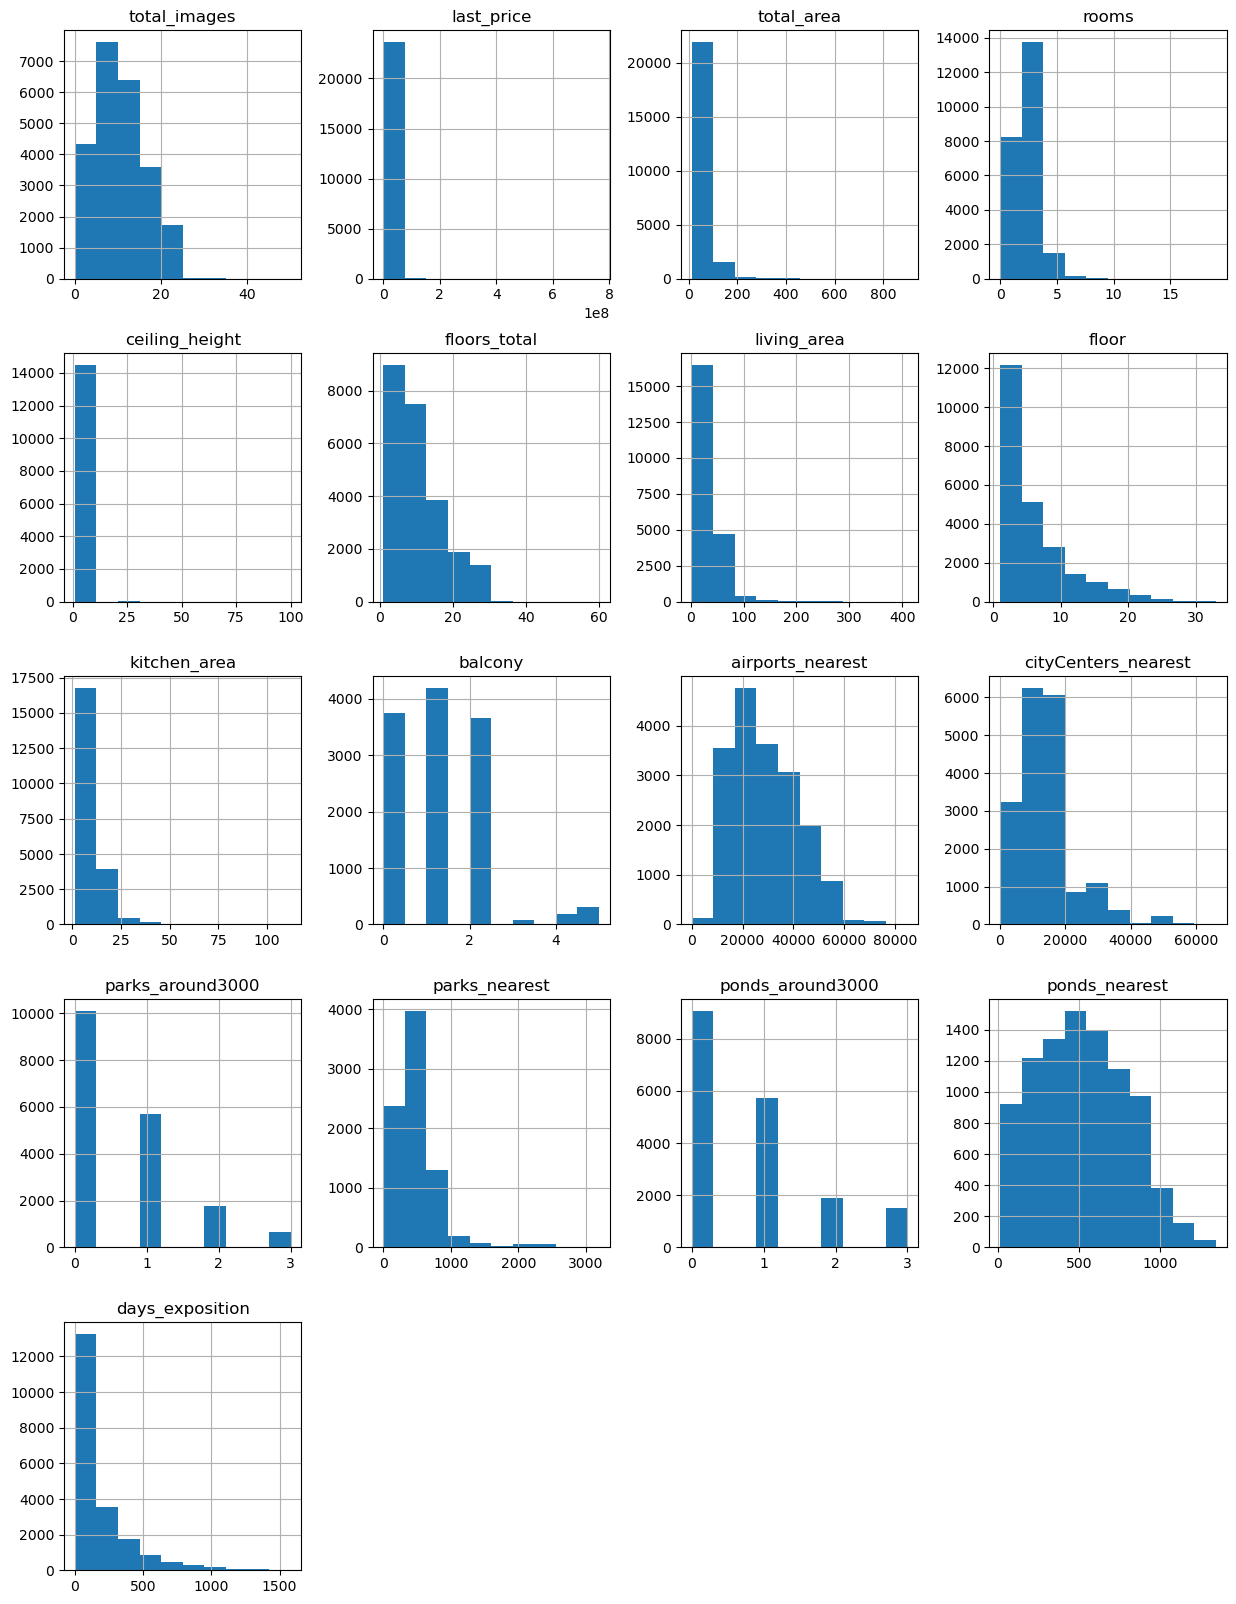

In [8]:
data.hist(figsize=(15, 20))

* В следующих столбцах есть пропуски: ceiling_height; floors_total; living_area; is_apartment; studio; kitchen_area; balcony; locality_name; airports_nearest; cityCenters_nearest; parks_around3000; parks_nearest; ponds_around3000; ponds_nearest; days_exposition. 

* Пропуски в столбцах locality_name и floors_total заполнить не удастся, поскольку эти данные заполнялись пользователем и без них невозможно будет в дальнейшем решать поставленные задачи. 

* Названия столбца cityCentres_nearest не приведено в нижний и змеиный регистры.

* Большая часть данных представлена типом object (object(17)), что делает невозможным проведение ряда операций с ними.

* ceiling_height - по-видимому пользователь решил не указывать эти данные.
  
* is_apartment - пропуски здесь скорее всего означают, что это не аппартаменты.
  
* Столбец first_day_exposition имеет пропуски, которые могут указывать на то, что на момент выгрузки данных объявления еще не были сняты.

* Пропуски в столбцах  is_apartment, ponds_around3000, balcony, parks_around3000 указывают на наличие или отсутствие признака.

______________________________________________________

* The following columns have missing values: ceiling_height; floors_total; living_area; is_apartment; studio; kitchen_area; balcony; locality_name; airports_nearest; cityCenters_nearest; parks_around3000; parks_nearest; ponds_around3000; ponds_nearest; days_exposition.

* It will not be possible to fill in the missing values in the locality_name and floors_total columns because these data were entered by the user, and without them, it will be impossible to solve the tasks set forth.

* The column name cityCentres_nearest is not converted to lowercase and snake_case.

* Most of the data is represented by the object type (object(17)), making it impossible to perform a series of operations on them.

* ceiling_height - apparently, the user decided not to specify this data.

* is_apartment - the missing values here likely indicate that these are not apartments.

* The first_day_exposition column has missing values, which may indicate that the listings had not been removed at the time of data extraction.

* Missing values in the columns is_apartment, ponds_around3000, balcony, parks_around3000 indicate the presence or absence of the feature.

Создадим переменную для сравнения после предобработи и анализа данных. 

In [11]:
original_data = data.shape

In [12]:
original_data

(23699, 22)

## Педобработка данных
Data Preprocessing

Сначала приведем все столбцы в нижний регистер и заменим пробелы на нижнее подчеркивание. 

First, we will convert all column names to lowercase and replace spaces with underscores.

In [15]:
data.columns = data.columns.str.lower().str.replace(' ', '_')

переименуем столбец citycenters_nearest в city_centers_nearest

Rename the column citycenters_nearest to city_centers_nearest.

In [17]:
data.rename(columns={'citycenters_nearest': 'city_centers_nearest'}, inplace=True)

Подсчитываем количество дубликатов. 

Count the number of duplicates.

In [19]:
data.duplicated().sum()

0

### Находим и изучаем пропущенные значения в столбцах
 Identify and examine missing values in the columns.

Подсчитываем количество пропусков. 

Count the number of missing values.

In [22]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В столбце locality_name и floors_total есть пропуски, которые мы никак не сможем заполнить, поэтому удалим их.

In the columns locality_name and floors_total, there are missing values that we cannot fill, so we will remove them.

In [24]:
data = data.dropna(subset=['locality_name'])

In [25]:
data = data.dropna(subset=['floors_total'])

В столбце rooms минимальное значение 0, что не может соответствовать действительности. Заполнить эти сведения не получится, поэтому проще сразу удалить строки, в которых меньше 1. 

In the rooms column, the minimum value is 0, which cannot correspond to reality. It is not possible to fill in these details, so it is easier to immediately remove the rows where the value is less than 1.

In [27]:
data = data.drop(data[data['rooms'] < 1].index)

Обновим индексацию в датафрейме 

Update the indexing in the dataframe.

Устраняем пропуски в столбцах is_apartment, ponds_around3000, balcony, parks_around3000. Поскольку в них отражены параметры, которые в том числе указывают на наличие или отсутствие показателя.

Eliminate missing values in the columns is_apartment, ponds_around3000, balcony, parks_around3000. Since these columns reflect parameters that indicate the presence or absence of a feature.

In [30]:
data['is_apartment'] = data['is_apartment'].fillna(False)

C:\Users\User\AppData\Local\Temp\ipykernel_4996\2052809825.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['is_apartment'] = data['is_apartment'].fillna(False)


In [31]:
data['balcony'] = data['balcony'].fillna(0)

### Изучаем и меняем типы данных в каждом из столбцов

Examine and Change Data Types in Each Column

Меняем тип данных в столбцах, чтобы в дальнейшем с ними можно было проводить вычисления. 

Change the data types in the columns to enable calculations in the future.

In [34]:
data['balcony'] = data['balcony'].astype('float64')

In [35]:
data['ceiling_height'] = data['ceiling_height'].astype('float64')

In [36]:
data['last_price'] = data['last_price'].astype('float64')

In [37]:
data['total_area'] = data['total_area'].astype('float64')

In [38]:
data['floors_total'] = data['floors_total'].astype('float64')

In [39]:
data['living_area'] = data['living_area'].astype('float64')

In [40]:
data['kitchen_area'] = data['kitchen_area'].astype('float64')

In [41]:
data['airports_nearest'] = data['airports_nearest'].astype('float64')

In [42]:
data['city_centers_nearest'] = data['city_centers_nearest'].astype('float32')

In [43]:
data['parks_around3000'] = data['parks_around3000'].astype('float32')

In [44]:
data['parks_nearest'] = data['parks_nearest'].astype('float32')

In [45]:
data['ponds_around3000'] = data['ponds_around3000'].astype('float32')

In [46]:
data['ponds_nearest'] = data['ponds_nearest'].astype('float32')

In [47]:
data['days_exposition'] = data['days_exposition'].astype('float32')

В столбце first_day_exposition указана дата, но тип данных указан object. Приведем столбец к соответствующему типу данных. 

In the first_day_exposition column, the date is indicated, but the data type is object. We will convert the column to the appropriate data type.

In [49]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

В столбцах is_apartment, open_plan, studio содержат булевы значения, но представлены типом данных object 

The columns is_apartment, open_plan, and studio contain boolean values but are represented as object data types.

In [51]:
data['is_apartment'] = data['is_apartment'].astype('bool')

In [52]:
data['open_plan'] = data['open_plan'].astype('bool')

In [53]:
data['studio'] = data['studio'].astype('bool')

После изменения типов данных в столбцах методом describe получем числовое описание данных. 

After changing the data types in the columns, we use the describe method to get a numerical description of the data.

In [55]:
data.describe()

total_images    last_price    total_area  \
count  23371.000000  2.337100e+04  23371.000000   
mean       9.895340  6.566584e+06     60.580161   
min        0.000000  1.219000e+04     12.000000   
25%        6.000000  3.450000e+06     40.200000   
50%        9.000000  4.650000e+06     52.000000   
75%       14.000000  6.800000e+06     70.000000   
max       50.000000  7.630000e+08    900.000000   
std        5.682868  1.094248e+07     35.613640   

                first_day_exposition         rooms  ceiling_height  \
count                          23371  23371.000000    14399.000000   
mean   2017-11-09 20:23:47.615420928      2.087844        2.769387   
min              2014-11-27 00:00:00      1.000000        1.000000   
25%              2017-05-14 00:00:00      1.000000        2.510000   
50%              2017-12-13 00:00:00      2.000000        2.650000   
75%              2018-08-27 00:00:00      3.000000        2.800000   
max              2019-05-03 00:00:00     19.000000      100.000000   
std                              NaN      1.066362        1.249022   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23371.000000  21517.000000  23371.000000  21343.000000  23371.000000   
mean      10.624235     34.587410      5.856061     10.560994      0.590090   
min        1.000000      2.000000      1.000000      1.300000      0.000000   
25%        5.000000     18.700000      2.000000      7.000000      0.000000   
50%        9.000000     30.000000      4.000000      9.100000      0.000000   
75%       16.000000     42.430000      8.000000     12.000000      1.000000   
max       60.000000    409.700000     33.000000    112.000000      5.000000   
std        6.567545     22.083566      4.851830      5.900630      0.960162   

       airports_nearest  city_centers_nearest  parks_around3000  \
count      17924.000000          17947.000000      17948.000000   
mean       28824.925519          14197.798828          0.613662   
min            0.000000            181.000000          0.000000   
25%        18584.250000           9236.000000          0.000000   
50%        26770.000000          13092.000000          0.000000   
75%        37289.500000          16285.000000          1.000000   
max        84869.000000          65968.000000          3.000000   
std        12629.362059           8631.605469          0.803055   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  
count    8002.000000      17948.000000    8968.000000     20214.000000  
mean      490.245575          0.769166     518.244751       181.368454  
min         1.000000          0.000000      13.000000         1.000000  
25%       288.000000          0.000000     293.000000        45.000000  
50%       454.000000          0.000000     503.000000        96.000000  
75%       612.000000          1.000000     730.000000       232.000000  
max      3190.000000          3.000000    1344.000000      1580.000000  
std       341.664825          0.939126     278.036194       220.095459

В столбце parks_nearest нет значений сильно превышающих 3000, что может указывать на то, что этот столбец не противоречит данным из столбца parks_around3000. Аналогичная ситуация со столбом ponds_nearest - в нем нет значений, превышающих пороговое значение столбца ponds_around3000. 

In the parks_nearest column, there are no values significantly exceeding 3000, which may indicate that this column does not contradict the data in the parks_around3000 column. A similar situation exists with the ponds_nearest column—it does not contain values exceeding the threshold value of the ponds_around3000 column.

### Изучаем уникальные значения в столбце с названиями населенных пунктов и устраняем неявные дубликаты

Examine the unique values in the column with the names of the localities and eliminate implicit duplicates.

Выведм все уникальные значения в столбце locality_name. 

Output all unique values in the locality_name column.

In [59]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

В столбце часто встречаются указания на тип населенного пункта с различным написанием. Например, "посёлок" и "поселок". В некоторых случаях указания на тип одного и того же населенного пункта детализированы в различной степени. Например, "поселок городского типа" и "городской поселок", и т.д. В ряде случаев в названии одного и того же населенного пункта содержится указание на его тип, например "посёлок Мурино" и "Мурино".

Подсчитаем количество уникальных значений в столбце locality_name 

The column often contains indications of the type of locality with different spellings. For example, "посёлок" and "поселок". In some cases, the indications of the type of the same locality are detailed to different degrees. For example, "поселок городского типа" and "городской поселок", etc. In some cases, the name of the same locality contains an indication of its type, for example, "посёлок Мурино" and "Мурино".

Count the number of unique values in the locality_name column.

In [61]:
data['locality_name'].value_counts()

locality_name
Санкт-Петербург                    15542
посёлок Мурино                       494
посёлок Шушары                       435
Всеволожск                           392
Пушкин                               369
                                   ...  
деревня Пельгора                       1
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
посёлок Дзержинского                   1
Name: count, Length: 362, dtype: int64

Удалось выявить, что в столбце представлено 364 уникальных значения. 

Приводим все значения этого столбца к нижнему регистру, чтобы исключить возможность отличий из-за регистра букв. 

We found that the column contains 364 unique values.

Convert all values in this column to lowercase to exclude the possibility of differences due to letter case.

In [63]:
data['locality_name'] = data['locality_name'].str.lower()

Воспользуемся цепочкой методов replace для избавления от неявных дубликатов. 

Use the replace method chain to eliminate implicit duplicates.

In [65]:
data['locality_name'] = (
                    data['locality_name'] 
                    .str.replace('ё', 'е') 
                    .replace(['поселок городского типа', 'посёлок городского типа', 'поселок', 'коттеджный поселок', 'поселок при железнодорожной станции','городской поселок', 'поселок станции', 'посёлок при железнодорожной станции'], 'поселок', regex=True) 
                    .replace(['садоводческое некоммерческое товарищество'], 'садовое товарищество', regex=True )
                    .str.strip()
)

Проверяем изменилось ли количество уникальных значений в столбце. 

Check if the number of unique values in the column has changed.

In [67]:
data['locality_name'].value_counts()

locality_name
санкт-петербург                    15542
поселок мурино                       526
поселок шушары                       435
всеволожск                           392
пушкин                               369
                                   ...  
поселок белоостров                     1
деревня пельгора                       1
поселок каложицы                       1
поселок платформа 69-й километр        1
поселок дзержинского                   1
Name: count, Length: 316, dtype: int64

In [68]:
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок красный бор', 'гатчина', 'деревня федоровское', 'выборг',
       'кронштадт', 'кировск', 'деревня новое девяткино',
       'поселок металлострой', 'поселок лебяжье', 'поселок сиверский',
       'поселок молодцово', 'поселок кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок ефимовский', 'поселок плодовое', 'деревня заклинье',
       'поселок торковичи', 'поселок первомайское', 'красное село',
       'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет', 'сланцы',
       'село путилово', 'ивангород', 'мурино', 'шлиссельбург',
       'никольское', 'зелено

### Заполняем пропуски в столбце ceiling_height 

Fill Missing Values in the ceiling_height Column

Попробуем их заполнить медианым значением высоты потолков каждого поселения. 

Сначала вычислим медиану для каждого населенного пункта.

Try to fill them with the median value of the ceiling height for each locality.

First, calculate the median for each locality.

In [71]:
median_ceiling_height = data.groupby('locality_name')['ceiling_height'].transform('median')

Теперь заполним пропуски в столбце ceiling_height медианным значением высоты потолков каждого населенного пункта. 

Now, fill the missing values in the ceiling_height column with the median value of the ceiling height for each locality.

In [73]:
data['ceiling_height'].fillna(median_ceiling_height, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_4996\3568703993.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ceiling_height'].fillna(median_ceiling_height, inplace=True)


Теперь заполним оставшиеся пропуски медианным значением всей выборки. 

Now, fill the remaining missing values with the median value of the entire sample.

In [75]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_4996\2423943887.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)


### Заполняем пропуски в столбце airports_nearest         

Fill Missing Values in the airports_nearest Column

Количество пропусков в столбцах airport_nearest и city_centers_nearest идентично. Попробуем получить срез данных с пропусками в этих столбцах.

The number of missing values in the airports_nearest and city_centers_nearest columns is identical. Let's try to get a slice of data with missing values in these columns.

In [78]:
missing_airport_nearest = data.loc[data['airports_nearest'].isna()].head(20)

In [79]:
missing_airport_nearest

total_images  last_price  total_area first_day_exposition  rooms  \
5             10   2890000.0       30.40           2018-09-10      1   
8             20   2900000.0       33.16           2018-05-23      1   
12            10   3890000.0       54.00           2016-06-30      2   
22            20   5000000.0       58.00           2017-04-24      2   
30            12   2200000.0       32.80           2018-02-19      1   
37            10   1990000.0       45.80           2017-10-28      2   
38            10   3150000.0       40.00           2018-03-29      1   
47            17   3600000.0       56.10           2018-10-18      3   
60             3   2740000.0       35.00           2018-01-01      1   
62             0   4800000.0       78.60           2017-09-17      3   
64            13   3100000.0       44.30           2017-11-07      2   
66             6   3450000.0       34.00           2015-12-16      1   
68            11   4150000.0       74.00           2017-08-04      3   
69             6   4010000.0       50.70           2018-09-16      2   
76            12   2800000.0       55.10           2016-05-14      3   
79            12   2590000.0       55.70           2017-12-18      3   
80             8   4050000.0       79.10           2018-02-23      3   
81             9  10949000.0       68.00           2018-12-27      1   
84            11   2400000.0       43.90           2019-03-13      2   
88             0   1700000.0       33.10           2019-04-09      1   

    ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
5             2.65          12.0        14.40      5         False  ...   
8             2.70          27.0        15.43     26         False  ...   
12            2.60           5.0        30.00      5         False  ...   
22            2.75          25.0        30.00     15         False  ...   
30            2.56           9.0          NaN      2         False  ...   
37            2.50           5.0          NaN      1         False  ...   
38            2.75          18.0        16.30      9         False  ...   
47            2.55           4.0        42.50      3         False  ...   
60            2.70          12.0          NaN      8         False  ...   
62            2.80           9.0        48.80      5         False  ...   
64            2.50           5.0        29.00      5         False  ...   
66            2.60          17.0        17.40      8         False  ...   
68            2.80           5.0        44.00      1         False  ...   
69            2.60           5.0        28.90      5         False  ...   
76            2.60           5.0        38.40      1         False  ...   
79            2.50           4.0        42.60      4         False  ...   
80            3.00          15.0        45.23      1         False  ...   
81            2.70          10.0          NaN      6         False  ...   
84            2.50           2.0        27.46      1         False  ...   
88            2.50           5.0        18.40      1         False  ...   

    kitchen_area  balcony            locality_name  airports_nearest  \
5           9.10      0.0          поселок янино-1               NaN   
8           8.81      0.0           поселок мурино               NaN   
12          9.00      0.0                сертолово               NaN   
22         11.00      2.0          деревня кудрово               NaN   
30           NaN      0.0                 коммунар               NaN   
37           NaN      0.0      поселок красный бор               NaN   
38         11.60      0.0           поселок мурино               NaN   
47          5.70      1.0                  гатчина               NaN   
60           NaN      0.0           поселок мурино               NaN   
62         11.90      2.0                сертолово               NaN   
64          5.30      0.0                  гатчина               NaN   
66         11.50      2.0           поселок мурино 

In [80]:
missing_city_centers_nearest = data.loc[data['city_centers_nearest'].isna()].head(20)

In [81]:
missing_city_centers_nearest

total_images  last_price  total_area first_day_exposition  rooms  \
5             10   2890000.0       30.40           2018-09-10      1   
8             20   2900000.0       33.16           2018-05-23      1   
12            10   3890000.0       54.00           2016-06-30      2   
22            20   5000000.0       58.00           2017-04-24      2   
30            12   2200000.0       32.80           2018-02-19      1   
37            10   1990000.0       45.80           2017-10-28      2   
38            10   3150000.0       40.00           2018-03-29      1   
47            17   3600000.0       56.10           2018-10-18      3   
60             3   2740000.0       35.00           2018-01-01      1   
62             0   4800000.0       78.60           2017-09-17      3   
64            13   3100000.0       44.30           2017-11-07      2   
66             6   3450000.0       34.00           2015-12-16      1   
68            11   4150000.0       74.00           2017-08-04      3   
69             6   4010000.0       50.70           2018-09-16      2   
76            12   2800000.0       55.10           2016-05-14      3   
79            12   2590000.0       55.70           2017-12-18      3   
80             8   4050000.0       79.10           2018-02-23      3   
81             9  10949000.0       68.00           2018-12-27      1   
84            11   2400000.0       43.90           2019-03-13      2   
88             0   1700000.0       33.10           2019-04-09      1   

    ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
5             2.65          12.0        14.40      5         False  ...   
8             2.70          27.0        15.43     26         False  ...   
12            2.60           5.0        30.00      5         False  ...   
22            2.75          25.0        30.00     15         False  ...   
30            2.56           9.0          NaN      2         False  ...   
37            2.50           5.0          NaN      1         False  ...   
38            2.75          18.0        16.30      9         False  ...   
47            2.55           4.0        42.50      3         False  ...   
60            2.70          12.0          NaN      8         False  ...   
62            2.80           9.0        48.80      5         False  ...   
64            2.50           5.0        29.00      5         False  ...   
66            2.60          17.0        17.40      8         False  ...   
68            2.80           5.0        44.00      1         False  ...   
69            2.60           5.0        28.90      5         False  ...   
76            2.60           5.0        38.40      1         False  ...   
79            2.50           4.0        42.60      4         False  ...   
80            3.00          15.0        45.23      1         False  ...   
81            2.70          10.0          NaN      6         False  ...   
84            2.50           2.0        27.46      1         False  ...   
88            2.50           5.0        18.40      1         False  ...   

    kitchen_area  balcony            locality_name  airports_nearest  \
5           9.10      0.0          поселок янино-1               NaN   
8           8.81      0.0           поселок мурино               NaN   
12          9.00      0.0                сертолово               NaN   
22         11.00      2.0          деревня кудрово               NaN   
30           NaN      0.0                 коммунар               NaN   
37           NaN      0.0      поселок красный бор               NaN   
38         11.60      0.0           поселок мурино               NaN   
47          5.70      1.0                  гатчина               NaN   
60           NaN      0.0           поселок мурино               NaN   
62         11.90      2.0                сертолово               NaN   
64          5.30      0.0                  гатчина               NaN   
66         11.50      2.0           поселок мурино 

В обих случаях речь идет о преимущественно небольших поселениях, которые  для которых растояние до центра может быть меньше одного километра, а расстояние до ближайшего аэропорта десятками километров. Заполнять пропуски в этом случае медианой было бы некорректно, поскольку ее значение может превышать диаметро такого поселения. Заполнение минимальными или максимальными значениями может привести к значительному количеству выбросов при последующем анализе.  

In both cases, we are dealing with predominantly small settlements where the distance to the center may be less than one kilometer, and the distance to the nearest airport is tens of kilometers. Filling in the missing values with the median would be incorrect in this case, as its value may exceed the diameter of such a settlement. Filling with minimum or maximum values could lead to a significant number of outliers in subsequent analysis.

In [83]:
missing_ponds_nearest = data.loc[data['ponds_nearest'].isna()].head(20)

In [84]:
missing_ponds_nearest

total_images  last_price  total_area first_day_exposition  rooms  \
1              7   3350000.0       40.40           2018-12-04      1   
5             10   2890000.0       30.40           2018-09-10      1   
6              6   3700000.0       37.30           2017-11-02      1   
7              5   7915000.0       71.60           2019-04-18      2   
8             20   2900000.0       33.16           2018-05-23      1   
9             18   5400000.0       61.00           2017-02-26      3   
11             9   3300000.0       44.00           2018-08-27      2   
12            10   3890000.0       54.00           2016-06-30      2   
16            11   6700000.0       82.00           2017-11-23      3   
18             8   3250000.0       31.00           2017-01-27      1   
19            16  14200000.0      121.00           2019-01-09      3   
20            12   6120000.0       80.00           2017-09-28      3   
21            13   3200000.0       31.60           2018-03-14      1   
22            20   5000000.0       58.00           2017-04-24      2   
30            12   2200000.0       32.80           2018-02-19      1   
31             8   7200000.0       67.90           2017-10-26      2   
33             8   4800000.0       73.00           2018-10-15      4   
34             3   3290000.0       33.00           2018-02-04      1   
36            13   3790000.0       45.00           2017-01-25      2   
37            10   1990000.0       45.80           2017-10-28      2   

    ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
1             2.60          11.0        18.60      1         False  ...   
5             2.65          12.0        14.40      5         False  ...   
6             2.64          26.0        10.60      6         False  ...   
7             2.70          24.0          NaN     22         False  ...   
8             2.70          27.0        15.43     26         False  ...   
9             2.50           9.0        43.60      7         False  ...   
11            2.55           5.0        31.00      4         False  ...   
12            2.60           5.0        30.00      5         False  ...   
16            3.05           5.0        55.60      1         False  ...   
18            2.50           5.0        19.40      2         False  ...   
19            2.75          16.0        76.00      8         False  ...   
20            2.70          27.0        48.00     11         False  ...   
21            2.70           5.0        16.90      2         False  ...   
22            2.75          25.0        30.00     15         False  ...   
30            2.56           9.0          NaN      2         False  ...   
31            2.80          16.0        38.10      4         False  ...   
33            2.50           9.0        51.60      5         False  ...   
34            2.55          16.0        14.00      3         False  ...   
36            2.70           9.0        27.00      9         False  ...   
37            2.50           5.0          NaN      1         False  ...   

    kitchen_area  balcony        locality_name  airports_nearest  \
1          11.00      2.0       поселок шушары           12817.0   
5           9.10      0.0      поселок янино-1               NaN   
6          14.40      1.0    поселок парголово           52996.0   
7          18.90      2.0      санкт-петербург           23982.0   
8           8.81      0.0       поселок мурино               NaN   
9           6.50      2.0      санкт-петербург           50898.0   
11          6.00      1.0            ломоносов           48252.0   
12          9.00      0.0            сертолово               NaN   
16          9.00      0.0      санкт-петербург           22108.0   
18          5.60      1.0      санкт-петербург           44060.0   
19         12.00      0.0      санкт-петербург           38900.0   
20         12.00      2.0    поселок парголово           53134.0   
21          5.70      1.0      

По-видимому, пропуски в столбце ponds_nearest, совпадают с пропусками в столбцах ponds_around3000, что онзначает, что в радиусе 3 километров прудов нет. Заполнение пропусков нулями 

Apparently, the missing values in the ponds_nearest column coincide with the missing values in the ponds_around3000 column, indicating that there are no ponds within a 3-kilometer radius. Fill the missing values with zeros.

#### Заполняем пропуски в столбцах kitchen_area и living_area

Fill Missing Values in the kitchen_area and living_area Columns

Подсчитаем оставшиеся пропуски 

Count the remaining missing values.

In [88]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1854
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2028
balcony                     0
locality_name               0
airports_nearest         5447
city_centers_nearest     5424
parks_around3000         5423
parks_nearest           15369
ponds_around3000         5423
ponds_nearest           14403
days_exposition          3157
dtype: int64

Количество пропусков в столбцах kitchen_area и living_area одинаковые. Попробуем вывести строки с пропусками в этих столбах 

The number of missing values in the kitchen_area and living_area columns is the same. Let's try to output the rows with missing values in these columns.

In [90]:
missing_values = data.loc[data['kitchen_area'].isna() | data['living_area'].isna(), ['kitchen_area', 'living_area', 'total_area', 'studio']]

In [91]:
missing_values

kitchen_area  living_area  total_area  studio
3               NaN          NaN      159.00   False
7              18.9          NaN       71.60   False
30              NaN          NaN       32.80   False
37              NaN          NaN       45.80   False
44              NaN          NaN       40.00   False
...             ...          ...         ...     ...
23663           NaN          NaN       88.00   False
23670           NaN          NaN       45.60   False
23679           NaN          NaN       35.00   False
23696           NaN         29.7       56.70   False
23697          23.3          NaN       76.75   False

[2466 rows x 4 columns]

Вероятно часть пропусков обусловлена трудностями разделения кухни и жилой площади в жилых помещениях типа студия. Поэтому выведем все пропуски для помещений, которые являются студиями. 

Probably, some of the missing values are due to the difficulty of separating the kitchen and living area in studio-type living spaces. Therefore, we will output all missing values for spaces that are studios.

In [93]:
studio_missing_values = missing_values[missing_values['studio'] == True]

In [94]:
studio_missing_values.head()

kitchen_area  living_area  total_area  studio
2389            NaN        17.08       25.41    True
3187            NaN        18.00       27.00    True
4180            NaN        21.00       34.00    True
8683            NaN        29.90       32.50    True
11026           NaN        19.00       28.00    True

Вычисляем среднее соотношение kitchen_area к total_area для студий

Calculate the average ratio of kitchen_area to total_area for studios.

In [96]:
kitchen_ratio_studio = (data[data['studio'] == True]['kitchen_area'] / data[data['studio'] == True]['total_area']).mean()

Вычисляем среднее соотношение living_area к total_area для студий

Calculate the average ratio of living_area to total_area for studios.

In [98]:
living_ratio_studio = (data[data['studio'] == True]['living_area'] / data[data['studio'] == True]['total_area']).mean()

Заполняем пропуски в kitchen_area для студий

Fill the missing values in kitchen_area for studios.

In [100]:
data.loc[data['studio'] == True, 'kitchen_area'] = data.loc[data['studio'] == True, 'kitchen_area'].fillna(
    data.loc[data['studio'] == True, 'total_area'] * kitchen_ratio_studio
)

Заполняем пропуски в living_area для студий

Fill the missing values in living_area for studios.

In [102]:
data.loc[data['studio'] == True, 'living_area'] = data.loc[data['studio'] == True, 'living_area'].fillna(
    data.loc[data['studio'] == True, 'total_area'] * living_ratio_studio
)

Вычисляем среднее соотношение kitchen_area к total_area для помещений, которые не являются студиями

Calculate the average ratio of kitchen_area to total_area for spaces that are not studios.

In [104]:
kitchen_ratio_non_studio = (data[data['studio'] == False]['kitchen_area'] / data[data['studio'] == False]['total_area']).mean()

Вычисляем среднее соотношение living_area к total_area для помещений, которые не являются студиями

Calculate the average ratio of living_area to total_area for spaces that are not studios.

In [106]:
living_ratio_non_studio = (data[data['studio'] == False]['living_area'] / data[data['studio'] == False]['total_area']).mean()

Заполняем пропуски в kitchen_area для помещений, которые не являются студиями

Fill the missing values in kitchen_area for spaces that are not studios.

In [108]:
data.loc[data['studio'] == False, 'kitchen_area'] = data.loc[data['studio'] == False, 'kitchen_area'].fillna(
    data.loc[data['studio'] == False, 'total_area'] * kitchen_ratio_non_studio
)

Заполняем пропуски в living_area для помещений, которые не являются студиями

Fill the missing values in living_area for spaces that are not studios.

In [110]:
data.loc[data['studio'] == False, 'living_area'] = data.loc[data['studio'] == False, 'living_area'].fillna(
    data.loc[data['studio'] == False, 'total_area'] * living_ratio_non_studio
)

Проверяем сколько пропусков осталось.

Check how many missing values remain.

In [112]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area               11
balcony                     0
locality_name               0
airports_nearest         5447
city_centers_nearest     5424
parks_around3000         5423
parks_nearest           15369
ponds_around3000         5423
ponds_nearest           14403
days_exposition          3157
dtype: int64

### Добавьте в таблицу новые столбцы

Add New Columns to the Table

#### Добавляем столбец с ценой одного квадратного метра 

Add a Column with the Price per Square Meter

In [115]:
data['price_per_sqm'] = (data['last_price'] / data['total_area']).round(2)

#### Добавляем столбец с указанием дня недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

Add a Column Indicating the Day of the Week the Advertisement Was Published (0 — Monday, 1 — Tuesday, and so on)

In [117]:
data['publication_weekday'] = data['first_day_exposition'].dt.dayofweek

#### Добавляем столбец с указанием месяца публикации объявления.

Add a Column Indicating the Month of the Advertisement Publication

In [119]:
data['publication_month'] = data['first_day_exposition'].dt.month

#### Добавляем столбец с указанием года публикации. 

Add a Column Indicating the Month of the Advertisement Publication

In [121]:
data['publication_year'] = data['first_day_exposition'].dt.year

#### Добавляем столец с указанием типа этажа квартиры (значения — «‎первый», «последний», «другой»). Для этого проводим категоризацию данных. 

Add a Column Indicating the Type of Apartment Floor (values — “first”, “last”, “other”). For this, we categorize the data.

Определим тип этажа квартиры на основе значений столбцов 'floor' и 'floors_total'. Если значение в столбце 'floor' меньше 1 (например, отрицательное значение), функция возвращает строку 'ошибка'.Если значение в столбце 'floor' больше значения в столбце 'floors_total', функция также возвращает строку 'ошибка', что означает, что этаж квартиры указан некорректно.

Determine the type of apartment floor based on the values in the 'floor' and 'floors_total' columns. If the value in the 'floor' column is less than 1 (e.g., a negative value), the function returns the string 'error'. If the value in the 'floor' column is greater than the value in the 'floors_total' column, the function also returns the string 'error', indicating that the apartment floor is incorrectly specified.

In [124]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    elif row['floor'] < 1:
        return 'ошибка'
    elif row['floor'] > row['floors_total']:
        return 'ошибка'
    else:
        return 'другой'

In [125]:
data['floor_type'] = data.apply(floor_type, axis=1)

#### Добавляем столбец с указанием расстояния до центра города в километрах. 

Add a Column Indicating the Distance to the City Center in Kilometers

In [127]:
data['distance_to_center_km'] = (data['city_centers_nearest'] / 1000).round()

In [128]:
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
4             2  10000000.0       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70          16.0    51.000000      8         False  ...   
1            2.60          11.0    18.600000      1         False  ...   
2            2.70           5.0    34.300000      4         False  ...   
3            2.70          14.0    89.651834      9         False  ...   
4            3.03          14.0    32.000000     13         False  ...   

   parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
0          482.0               2.0          755.0              NaN   
1            NaN               0.0            NaN             81.0   
2           90.0               2.0          574.0            558.0   
3           84.0               3.0          234.0            424.0   
4          112.0               1.0           48.0            121.0   

  price_per_sqm  publication_weekday  publication_month  publication_year  \
0     120370.37                    3                  3              2019   
1      82920.79                    1                 12              2018   
2      92785.71                    3                  8              2015   
3     408176.10                    4                  7              2015   
4     100000.00                    1                  6              2018   

   floor_type  distance_to_center_km  
0      другой                   16.0  
1      первый                   19.0  
2      другой                   14.0  
3      другой                    7.0  
4      другой                    8.0  

[5 rows x 28 columns]

##  Исследовательский анализ данных

 Exploratory Data Analysis

### Анализ параметров  

Список параметров: 
* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего парка


Parameter Analysis
List of Parameters:

* Total area
* Living area
* Kitchen area
* Object price
* Number of rooms
* Ceiling height
* Type of apartment floor (“first”, “last”, “other”)
* Total number of floors in the building
* Distance to the city center in meters
* Distance to the nearest park

Поскольку параметры total_area, living_area и kitchen_area напрамую связаны, проверим есть ли в датафрейме строки в которых сумма значений в столбцах kitchen_area и living_area превышают значение total_area. 

Since the parameters total_area, living_area, and kitchen_area are directly related, check if there are rows in the dataframe where the sum of the values in the kitchen_area and living_area columns exceeds the value in the total_area column.

In [133]:
incorrect_apartment_area = data.loc[data['kitchen_area'] + data['living_area'] > data['total_area']]

In [134]:
incorrect_apartment_area

total_images  last_price  total_area first_day_exposition  rooms  \
184               7   2600000.0       30.20           2018-02-14      1   
424              14  11500000.0       98.00           2016-05-10      3   
545               9   4700000.0       23.80           2018-12-28      1   
551               8   3100000.0       31.59           2018-03-08      1   
601              12   5600000.0       53.70           2017-04-18      2   
...             ...         ...         ...                  ...    ...   
22095             6   2194000.0       36.50           2017-09-27      1   
22907             9  65000000.0      228.00           2016-06-02      4   
23102             0   5800000.0       66.00           2017-06-09      5   
23191             3   1900000.0       18.90           2016-04-04      1   
23202            13   4919880.0       67.92           2018-10-23      2   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
184              2.65           9.0        26.10      5         False  ...   
424              2.65           3.0        88.00      3         False  ...   
545              2.70          18.0        20.00      9         False  ...   
551              2.70          19.0        30.55      2         False  ...   
601              2.50          12.0        48.30      5         False  ...   
...               ...           ...          ...    ...           ...  ...   
22095            2.70           3.0        33.20      3         False  ...   
22907            2.70           5.0       200.00      2         False  ...   
23102            2.70           5.0        55.50      1         False  ...   
23191            2.50          16.0        16.00     12         False  ...   
23202            2.70           3.0        63.00      3         False  ...   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
184              NaN               1.0          824.0             12.0   
424              NaN               0.0            NaN             90.0   
545              NaN               0.0            NaN            108.0   
551              NaN               NaN            NaN             70.0   
601            220.0               1.0         1250.0            167.0   
...              ...               ...            ...              ...   
22095            NaN               2.0          639.0             36.0   
22907          619.0               3.0          269.0              NaN   
23102            NaN               0.0            NaN             21.0   
23191            NaN               NaN            NaN            115.0   
23202            NaN               NaN            NaN             60.0   

      price_per_sqm  publication_weekday  publication_month  publication_year  \
184        86092.72                    2                  2              2018   
424       117346.94                    1                  5              2016   
545       197478.99                    4                 12              2018   
551        98132.32                    3                  3              2018   
601       104283.05                    1                  4              2017   
...             ...                  ...                ...               ...   
22095      60109.59                    2                  9              2017   
22907     285087.72                    3                  6              2016   
23102      87878.79                    4                  6              2017   
23191     100529.10                    0                  4              2016   
23202      72436.40                    1                 10              2018   

       floor_type  distance_to_center_km  
184        другой                   15.0  
424     последний                   13.0  
545        другой                   12.0  
551        другой                    NaN  
601        другой                   13.0  
...           ...                    ...  
22095 

Заменим полученные строки суммой в строках, где сумма значений в столбцах kitchen_area и living_area больше значения в столбце total_area, суммой этих двух столбцов

Replace the obtained rows where the sum of the values in the kitchen_area and living_area columns is greater than the value in the total_area column with the sum of these two columns.

In [136]:
data = data.drop(incorrect_apartment_area.index)

##### Анализ параметра: общая площадь

Parameter Analysis: Total Area

In [138]:
data['total_area'].describe()

count    23268.000000
mean        60.609275
std         35.621781
min         13.000000
25%         40.200000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

<Axes: >

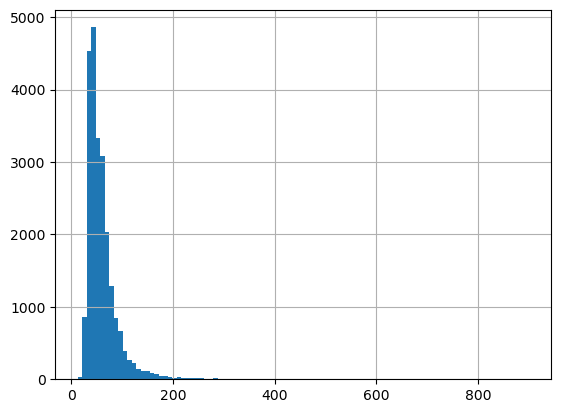

In [139]:
data['total_area'].hist(bins=100)

<Axes: >

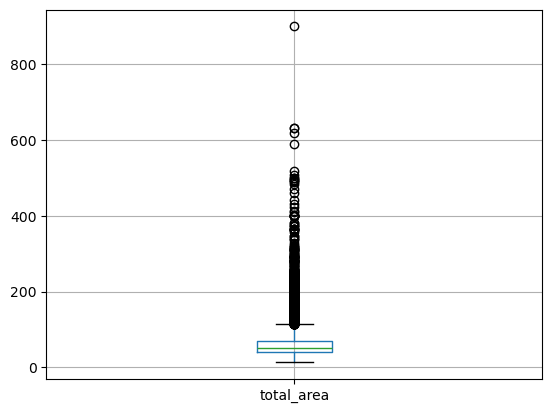

In [140]:
data.boxplot('total_area')

Точки за пределами усов представляют собой выбросы. Это значения, которые существенно отклоняются от остальных данных. Общая площадь большей части объявлений не превышает 200 метров. Большая часть выбросов находится в диапозозоне от 150 до примерно 570, далее идут единичные случаи. Также есть значения близкие к нулю, но не являющиеся выбросами. 

Points outside the whiskers represent outliers. These are values that significantly deviate from the rest of the data. The total area of most listings does not exceed 200 square meters. Most outliers are in the range of 150 to approximately 570, followed by individual cases. There are also values close to zero, but they are not outliers.

<Axes: >

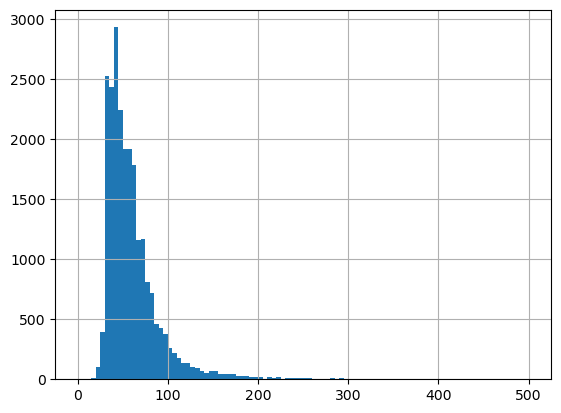

In [142]:
data['total_area'].hist(bins=100, range=(0, 500))

Минимальное значение столбца 12м. Скорее всего это не квартира, а комната. Попробуем отфильтровать помещения площадью меньше 20м. 

The minimum value in the column is 12 square meters. This is likely not an apartment but a room. Try to filter out spaces with an area of less than 20 square meters.

In [144]:
data.query('total_area < 20')[['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor_type', 'floors_total', 'parks_nearest', 'city_centers_nearest']]

total_area  living_area  kitchen_area  last_price  rooms  \
4542         18.0     9.000000      3.372113   3300000.0      1   
6084         18.0    13.000000      3.000000    770000.0      1   
8729         18.4    14.000000      2.400000   2200000.0      1   
10208        17.0    13.000000      3.000000   1900000.0      1   
12040        15.0     8.457720      2.810094   1900000.0      1   
12881        18.5    10.431188      3.465783   1500000.0      1   
16949        15.0     8.457720      2.810094   1550000.0      1   
17961        13.0     7.330024      2.435415   1400000.0      1   
19311        18.0    10.000000      3.372113   2190000.0      1   
19546        13.0     7.330024      2.435415   1850000.0      1   
19558        13.2     7.442794      2.472883   1686000.0      1   
19642        14.0    11.000000      2.000000   1190000.0      1   
19807        13.0    10.000000      2.435415   3800000.0      1   
20714        18.0    10.149264      3.372113   1200000.0      1   
22356        17.2     9.698186      3.222241   2050000.0      1   

       ceiling_height floor_type  floors_total  parks_nearest  \
4542             3.50     другой           5.0          349.0   
6084             2.60     другой           5.0            NaN   
8729             2.52  последний           3.0            NaN   
10208            2.75     другой           4.0            NaN   
12040            2.50     первый           5.0            NaN   
12881            2.50  последний           5.0            NaN   
16949            2.70     первый           9.0            NaN   
17961            2.60     первый           9.0            NaN   
19311            2.70     первый           2.0            NaN   
19546            3.40     другой           5.0          644.0   
19558            2.70     первый           5.0          361.0   
19642            2.70     первый           5.0            NaN   
19807            2.70     другой           5.0          592.0   
20714            2.50  последний           4.0            NaN   
22356            2.77     первый          23.0            NaN   

       city_centers_nearest  
4542                 4948.0  
6084                    NaN  
8729                30687.0  
10208                5639.0  
12040                   NaN  
12881                   NaN  
16949               16376.0  
17961               15945.0  
19311                9210.0  
19546                5483.0  
19558                4165.0  
19642               11122.0  
19807                1242.0  
20714                   NaN  
22356               13513.0

Удалим эти строки из датафрейма. 

Remove these rows from the dataframe.

In [146]:
data = data.query('total_area >= 20')

In [147]:
data['total_area'].describe()

count    23253.000000
mean        60.638081
std         35.615159
min         20.000000
25%         40.300000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

<Axes: >

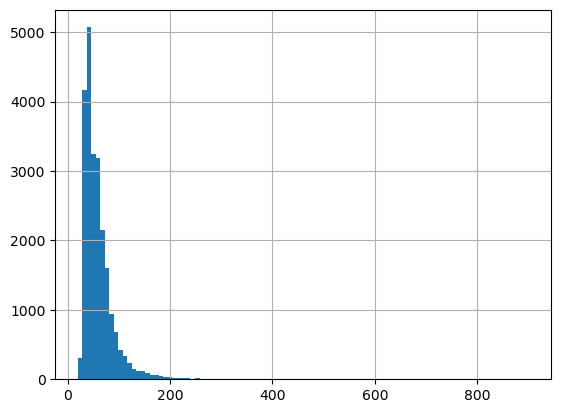

In [148]:
data['total_area'].hist(bins=100)

<Axes: >

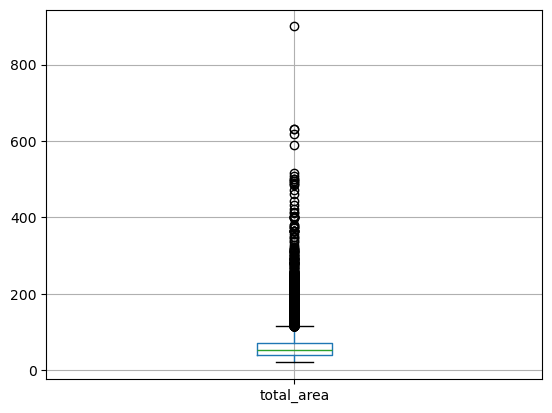

In [149]:
data.boxplot('total_area')

«Усы» простираются вверх и вниз от границ ящика на расстояние, равное 1,5 межквартильным размахам (IQR). У нас есть значения всех квартилей, попробуем используя эти данные получить срез данных, содержащих выбросы. 

The "whiskers" extend upwards and downwards from the box boundaries by a distance equal to 1.5 interquartile ranges (IQR). We have the values of all quartiles; try using these data to get a slice of data containing outliers.

In [151]:
Q3ta, Q1ta = np.percentile(data['total_area'], [75 ,25])

In [152]:
IQR = Q3ta - Q1ta

In [153]:
lower_bound = Q1ta - 1.5 * IQR

In [154]:
upper_bound = Q3ta + 1.5 * IQR

In [155]:
outliers_total_area = data[(data['total_area'] < lower_bound) | (data['total_area'] > upper_bound)]

In [156]:
outliers_total_area[['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor_type', 'floors_total', 'parks_nearest', 'city_centers_nearest']]

total_area  living_area  kitchen_area  last_price  rooms  \
3          159.00    89.651834     29.786996  64900000.0      3   
19         121.00    76.000000     12.000000  14200000.0      3   
35         149.00   104.000000     17.000000  15500000.0      5   
42         161.80    80.900000     17.600000  22000000.0      4   
51         161.00    38.000000     50.000000  45000000.0      3   
...           ...          ...           ...         ...    ...   
23566      126.50    60.900000     14.900000  11703000.0      3   
23574      139.00     3.000000     16.000000  64990000.0      3   
23600      132.00    78.000000     10.000000   8700000.0      3   
23684      145.00    71.400000     15.600000  21400000.0      4   
23694      133.81    73.300000     13.830000   9700000.0      3   

       ceiling_height floor_type  floors_total  parks_nearest  \
3                2.70     другой          14.0           84.0   
19               2.75     другой          16.0            NaN   
35               2.70     другой           5.0            NaN   
42               2.80     другой           4.0           47.0   
51               3.20     другой           8.0            NaN   
...               ...        ...           ...            ...   
23566            2.70     другой           6.0            NaN   
23574            3.00  последний           8.0          630.0   
23600            2.65     другой           9.0            NaN   
23684            3.00     другой          26.0            NaN   
23694            3.70     другой           5.0          796.0   

       city_centers_nearest  
3                    6800.0  
19                  12843.0  
35                   3502.0  
42                  30605.0  
51                   6589.0  
...                     ...  
23566               18013.0  
23574                5975.0  
23600               17882.0  
23684               11459.0  
23694                4232.0  

[1231 rows x 10 columns]

Данные о площади помещения заполнялись пользователем, поэтому у нас нет возможности как-либо скорректировать аномалии, поэтому создадим новый датафрейм с отфильтрованныи значениями  

The area data was filled in by the user, so we cannot correct the anomalies in any way. Therefore, create a new dataframe with filtered values.

In [158]:
filtered_total_area = data.drop(outliers_total_area.index)

In [159]:
filtered_total_area['total_area'].describe()

count    22022.000000
mean        54.611421
std         19.218005
min         20.000000
25%         40.000000
50%         50.500000
75%         65.800000
max        114.550000
Name: total_area, dtype: float64

<Axes: >

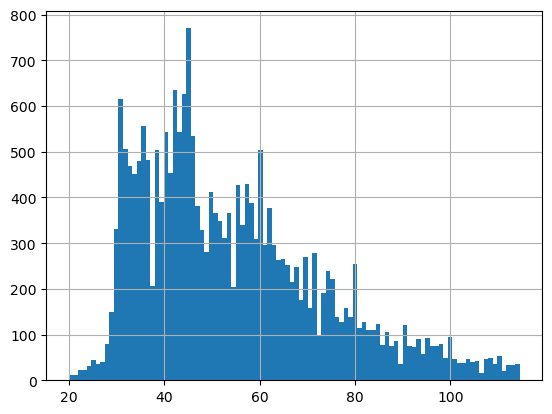

In [160]:
filtered_total_area['total_area'].hist(bins=100)

##### Анализ параметра: жилая площадь  

Parameter Analysis: Living Area

In [162]:
data['living_area'].describe()

count    23253.000000
mean        34.650785
std         22.299333
min          2.000000
25%         19.000000
50%         30.000000
75%         42.200000
max        409.700000
Name: living_area, dtype: float64

<Axes: >

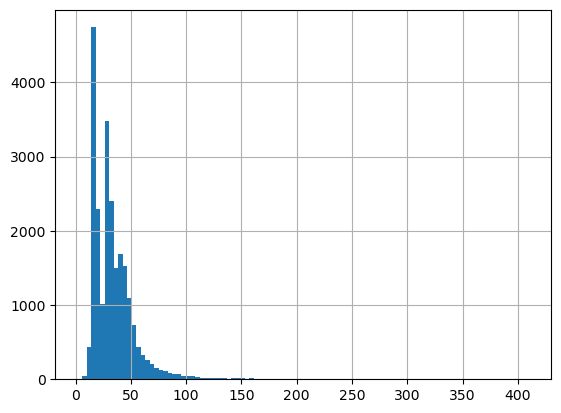

In [163]:
data['living_area'].hist(bins=100)

<Axes: >

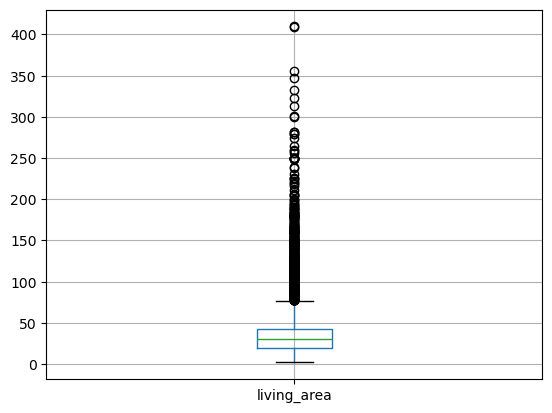

In [164]:
data.boxplot('living_area')

В соответствии с СП 54.13330.2016 минимальная площадь одной жилой комнаты не может быть меньше 8 метров. Поэтому выведем строки, в которых жилая площадь меньше. 

According to SP 54.13330.2016, the minimum area of a living room cannot be less than 8 square meters. Therefore, output the rows where the living area is less than this.

In [166]:
data.query('living_area < 8')[['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor_type', 'floors_total', 'parks_nearest', 'city_centers_nearest']]

total_area  living_area  kitchen_area  last_price  rooms  \
3242         41.0          3.0          11.0   4440000.0      1   
13915        52.0          2.0           9.0   6350000.0      2   
16431        31.0          6.0          17.0   3799000.0      1   
19251        33.0          6.5          18.0   4050000.0      1   
21943        77.6          5.4           9.8   6100000.0      4   
23574       139.0          3.0          16.0  64990000.0      3   

       ceiling_height floor_type  floors_total  parks_nearest  \
3242              2.7  последний          17.0            NaN   
13915             3.0     другой           6.0            NaN   
16431             2.6     первый           5.0          430.0   
19251             2.5     другой          22.0          458.0   
21943             2.5     первый           9.0          584.0   
23574             3.0  последний           8.0          630.0   

       city_centers_nearest  
3242                13073.0  
13915                6521.0  
16431                4826.0  
19251               10592.0  
21943               11270.0  
23574                5975.0

Видимо, в двух строках съехала запятая. Попробуем исправить. 

Apparently, in two rows, the comma has shifted. Try to correct it.

In [168]:
data.loc[3242, 'living_area'] *= 10

In [169]:
data.loc[21943, 'living_area'] *= 10

In [170]:
data.loc[[3242, 21943], 'living_area']

3242     30.0
21943    54.0
Name: living_area, dtype: float64

In [171]:
data.query('living_area < 8')[['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor_type', 'floors_total', 'parks_nearest', 'city_centers_nearest']]

total_area  living_area  kitchen_area  last_price  rooms  \
13915        52.0          2.0           9.0   6350000.0      2   
16431        31.0          6.0          17.0   3799000.0      1   
19251        33.0          6.5          18.0   4050000.0      1   
23574       139.0          3.0          16.0  64990000.0      3   

       ceiling_height floor_type  floors_total  parks_nearest  \
13915             3.0     другой           6.0            NaN   
16431             2.6     первый           5.0          430.0   
19251             2.5     другой          22.0          458.0   
23574             3.0  последний           8.0          630.0   

       city_centers_nearest  
13915                6521.0  
16431                4826.0  
19251               10592.0  
23574                5975.0

Теперь удалим эти строки из датафрейма и проверим результат

Now, remove these rows from the dataframe and check the result.

In [173]:
data = data.query('living_area >= 8')

In [174]:
data['living_area'].describe()

count    23249.000000
mean        34.659246
std         22.296289
min          8.000000
25%         19.000000
50%         30.000000
75%         42.200000
max        409.700000
Name: living_area, dtype: float64

<Axes: >

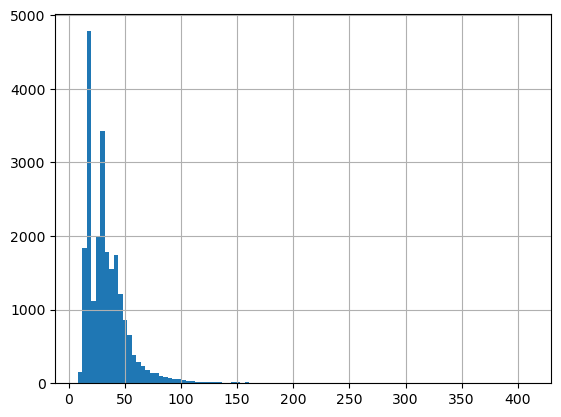

In [175]:
data['living_area'].hist(bins=100)

<Axes: >

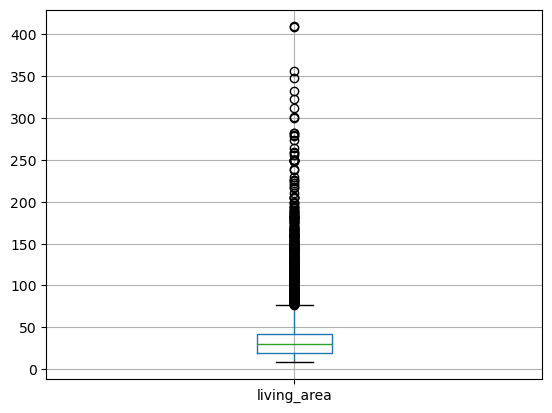

In [176]:
data.boxplot('living_area')

Получаем срез данных, содержащих выбросы.

Get a slice of data containing outliers.



In [178]:
Q3la, Q1la = np.percentile (data['living_area'], [75 ,25])

In [179]:
IQR = Q3la - Q1la

In [180]:
lower_bound = Q1la - 1.5 * IQR

In [181]:
upper_bound = Q3la + 1.5 * IQR

In [182]:
outliers_living_area = data[(data['living_area'] < lower_bound) | (data['living_area'] > upper_bound)]

In [183]:
outliers_living_area[['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor_type', 'floors_total', 'parks_nearest', 'city_centers_nearest']]

total_area  living_area  kitchen_area  last_price  rooms  \
3           159.0    89.651834     29.786996  64900000.0      3   
35          149.0   104.000000     17.000000  15500000.0      5   
42          161.8    80.900000     17.600000  22000000.0      4   
52          136.0    94.000000     11.000000  11795000.0      6   
106         124.1    79.400000     20.000000  10500000.0      5   
...           ...          ...           ...         ...    ...   
23491       250.0   104.000000     45.000000  21800000.0      3   
23514       136.5    96.000000     10.000000  12000000.0      5   
23516       139.5    82.550000     13.840000  22529250.0      4   
23600       132.0    78.000000     10.000000   8700000.0      3   
23622       114.0    81.300000     12.000000   7490000.0      4   

       ceiling_height floor_type  floors_total  parks_nearest  \
3                2.70     другой          14.0           84.0   
35               2.70     другой           5.0            NaN   
42               2.80     другой           4.0           47.0   
52               3.00  последний           2.0          526.0   
106              3.20     другой           4.0          384.0   
...               ...        ...           ...            ...   
23491            2.70     другой          12.0            NaN   
23514            3.45     другой           5.0          447.0   
23516            3.30     другой          16.0          441.0   
23600            2.65     другой           9.0            NaN   
23622            3.15  последний           4.0            NaN   

       city_centers_nearest  
3                    6800.0  
35                   3502.0  
42                  30605.0  
52                   6582.0  
106                  5527.0  
...                     ...  
23491               13138.0  
23514                4401.0  
23516                8460.0  
23600               17882.0  
23622                   NaN  

[855 rows x 10 columns]

Удаляем строки, содержащие выбросы. 

Remove the rows containing outliers.



In [185]:
filtered_living_area = data.drop(outliers_living_area.index)

In [186]:
filtered_living_area['living_area'].describe()

count    22394.000000
mean        31.636500
std         13.764853
min          8.000000
25%         18.800000
50%         30.000000
75%         40.789691
max         77.000000
Name: living_area, dtype: float64

<Axes: >

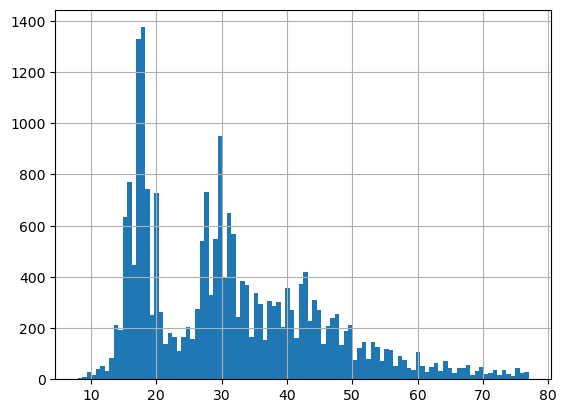

In [187]:
filtered_living_area['living_area'].hist(bins=100)

<Axes: >

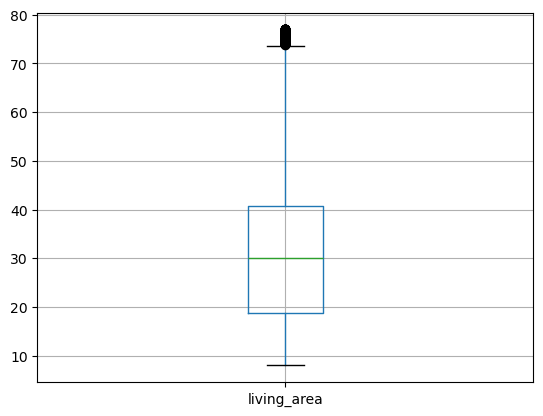

In [188]:
filtered_living_area.boxplot('living_area')

##### Анализ параметра: площадь кухни

Parameter Analysis: Kitchen Area



In [190]:
data['kitchen_area'].describe()

count    23238.000000
mean        10.594881
std          6.050165
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

<Axes: >

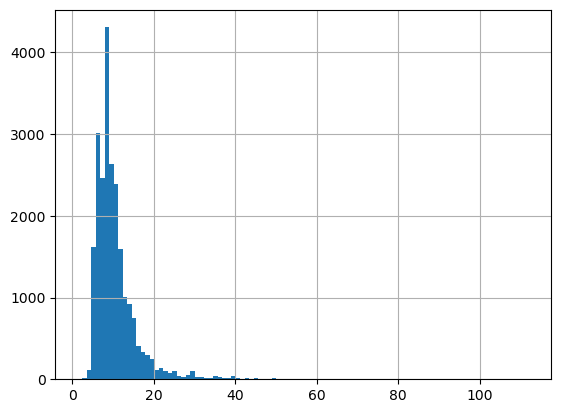

In [191]:
data['kitchen_area'].hist(bins=100)

<Axes: >

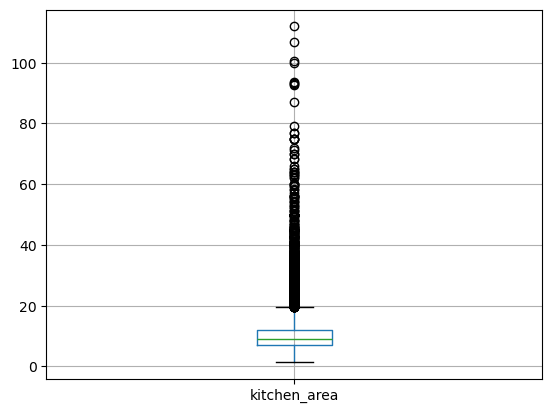

In [192]:
data.boxplot('kitchen_area')

В соответствии с СП 54.13330.2016 минимальная площадь кухни не может быть меньше 4 метров. Поэтому выведем строки, в которых жилая площадь меньше. 

According to SP 54.13330.2016, the minimum area of a kitchen cannot be less than 4 square meters. Therefore, output the rows where the kitchen area is less than this.



In [194]:
data.query('kitchen_area < 4')[['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor_type', 'floors_total', 'parks_nearest', 'city_centers_nearest']]

total_area  living_area  kitchen_area  last_price  rooms  \
906         27.00    18.000000      2.000000   2600000.0      1   
1608        20.10    11.333345      3.765526   2150000.0      1   
2165        25.00    17.000000      3.000000   3180000.0      1   
3078        43.00    29.300000      3.200000   6000000.0      2   
3195        25.60    16.200000      3.800000   2690000.0      1   
6262        24.00    16.000000      2.000000   3100000.0      2   
7047        21.00    14.900000      3.800000   2800000.0      1   
7577        20.60    10.550000      3.859196   2000000.0      1   
7950        66.40    44.400000      2.890000   5967734.0      2   
8712        42.70    27.500000      3.700000  14948000.0      2   
9138        23.29    21.000000      2.000000   2920000.0      1   
9395        21.30    14.920000      3.990333   1900000.0      1   
10964       20.00    16.000000      3.746792   1150000.0      1   
11033       32.00    16.000000      2.000000   5350000.0      1   
11475       40.80    26.800000      3.800000   2500000.0      2   
12358       20.80    15.790000      3.896664   1900000.0      1   
12370       59.20    32.600000      3.500000   7575000.0      2   
12595       44.40    28.400000      3.400000   3700000.0      2   
13496       20.67    14.850000      3.872310   1900000.0      1   
13814       28.00    18.000000      3.000000   3650000.0      1   
14183       47.00    36.000000      3.500000   5200000.0      2   
14836       45.00    28.400000      3.300000   3900000.0      2   
15014       28.30    20.200000      3.000000   3350000.0      1   
16367       25.70    22.600000      2.000000   2720000.0      1   
16991       20.00    11.276960      3.746792   1750000.0      1   
17424       26.69    17.400000      3.000000   2700000.0      1   
17834       34.70    15.500000      2.300000   2940000.0      1   
17860       20.00    11.276960      3.746792   2385000.0      1   
18066       23.80    16.800000      3.000000   3600000.0      1   
20217       28.50    19.500000      1.300000   4250000.0      1   
21419       20.00    14.000000      2.000000   1870000.0      1   
23498       54.00    33.000000      3.500000   1600000.0      2   

       ceiling_height floor_type  floors_total  parks_nearest  \
906              2.75     другой          23.0            NaN   
1608             2.70     первый           9.0            NaN   
2165             2.50     другой          25.0            NaN   
3078             2.90     другой           4.0          319.0   
3195             2.50     другой           9.0            NaN   
6262             3.00  последний           5.0          426.0   
7047             2.70     другой           5.0            NaN   
7577             2.56     другой          18.0            NaN   
7950             2.70     другой           4.0            NaN   
8712             2.80  последний           4.0          290.0   
9138             2.70     первый           3.0            NaN   
9395             2.70     другой          19.0            NaN   
10964            2.70     первый           3.0            NaN   
11033            2.70     другой          14.0            NaN   
11475            2.50  последний           2.0            NaN   
12358            3.00     первый          19.0            NaN   
12370            2.70     другой          23.0            NaN   
12595            2.50  последний           5.0            NaN   
13496            2.70     другой          24.0            NaN   
13814            2.60     другой          19.0            NaN   
14183            3.30     другой           4.0            NaN   
14836            3.00     первый           1.0            NaN   
15014            2.77     другой          27.0            NaN   
16367            2.70     другой          19.0            NaN   
16991            2.70     другой          22.0            NaN   
17424            2.78     другой          19.0            NaN   
17834            2.70     другой        

Удаляем данные, содержащие аномально низкие значения 

Remove data containing abnormally low values.



In [196]:
data = data.query('kitchen_area >= 4')

In [197]:
data['kitchen_area'].describe()

count    23206.000000
mean        10.605199
std          6.047883
min          4.000000
25%          7.000000
50%          9.160000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

<Axes: >

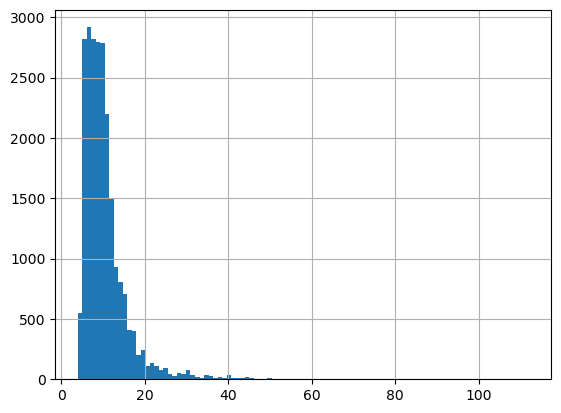

In [198]:
data['kitchen_area'].hist(bins=100)

<Axes: >

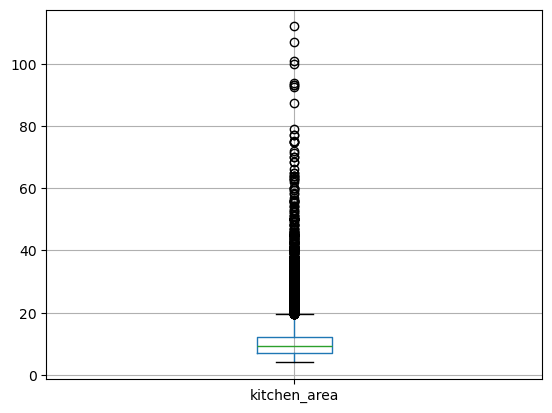

In [199]:
data.boxplot('kitchen_area')

Получаем срез данных содержащих, выбросы 

Get a slice of data containing outliers.



In [201]:
Q3ka, Q1ka = np.percentile(data['kitchen_area'], [75 ,25])

In [202]:
IQR = Q3ka - Q1ka

In [203]:
lower_bound = Q1ka - 1.5 * IQR

In [204]:
upper_bound = Q3ka + 1.5 * IQR

In [205]:
outliers_kitchen_area = data[(data['kitchen_area'] < lower_bound) | (data['kitchen_area'] > upper_bound)]

In [206]:
outliers_kitchen_area['kitchen_area'].describe()

count    1307.000000
mean       28.841658
std        11.439008
min        19.502052
25%        21.500000
50%        25.000000
75%        31.765000
max       112.000000
Name: kitchen_area, dtype: float64

In [207]:
outliers_kitchen_area[['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor_type', 'floors_total', 'parks_nearest', 'city_centers_nearest']]

total_area  living_area  kitchen_area  last_price  rooms  \
0          108.00    51.000000     25.000000  13000000.0      3   
3          159.00    89.651834     29.786996  64900000.0      3   
4          100.00    32.000000     41.000000  10000000.0      2   
24          97.20    46.500000     19.600000   6500000.0      2   
51         161.00    38.000000     50.000000  45000000.0      3   
...           ...          ...           ...         ...    ...   
23448      180.00   126.000000     20.000000  14700000.0      6   
23491      250.00   104.000000     45.000000  21800000.0      3   
23507       73.83    31.650000     21.550000   7360000.0      2   
23549      184.00    55.700000     24.500000  19600000.0      3   
23697       76.75    43.275335     23.300000  11475000.0      2   

       ceiling_height floor_type  floors_total  parks_nearest  \
0                2.70     другой          16.0          482.0   
3                2.70     другой          14.0           84.0   
4                3.03     другой          14.0          112.0   
24               2.70     первый           3.0          411.0   
51               3.20     другой           8.0            NaN   
...               ...        ...           ...            ...   
23448            3.00     другой           6.0            NaN   
23491            2.70     другой          12.0            NaN   
23507            2.70     другой          21.0            NaN   
23549            3.00  последний          19.0            NaN   
23697            3.00     другой          17.0          173.0   

       city_centers_nearest  
0                   16028.0  
3                    6800.0  
4                    8098.0  
24                   2336.0  
51                   6589.0  
...                     ...  
23448                5089.0  
23491               13138.0  
23507               16293.0  
23549                4837.0  
23697               10364.0  

[1307 rows x 10 columns]

Создаем новую таблицу без выбросов.

Create a new table without outliers.



In [209]:
filtered_kitchen_area = data.drop(outliers_kitchen_area.index)

In [210]:
filtered_kitchen_area['kitchen_area'].describe()

count    21899.00000
mean         9.51679
std          3.14988
min          4.00000
25%          7.00000
50%          9.00000
75%         11.20000
max         19.50000
Name: kitchen_area, dtype: float64

<Axes: >

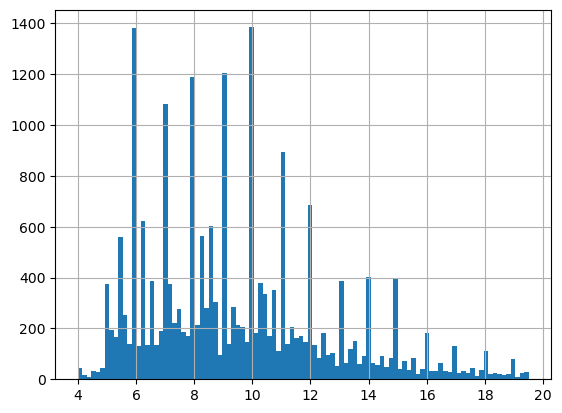

In [211]:
filtered_kitchen_area['kitchen_area'].hist(bins=100)

<Axes: >

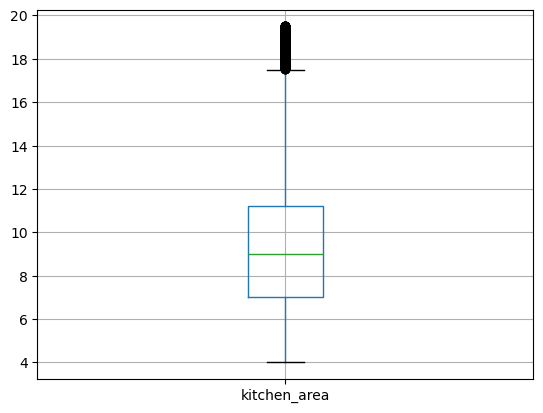

In [212]:
filtered_kitchen_area.boxplot('kitchen_area')

#####  Анализ параметра: цена объекта

Parameter Analysis: Object Price



In [214]:
data['last_price'].describe()

count    2.320600e+04
mean     6.568480e+06
std      1.091996e+07
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

В столбце есть аномально низкие и высокие значения. Квартира явно не может стоить 430000. Скоре всего это ошибка пользователя при офрмлении объявления.  

The column contains abnormally low and high values. An apartment clearly cannot cost 430,000. This is likely a user error when filling out the listing.



<Axes: >

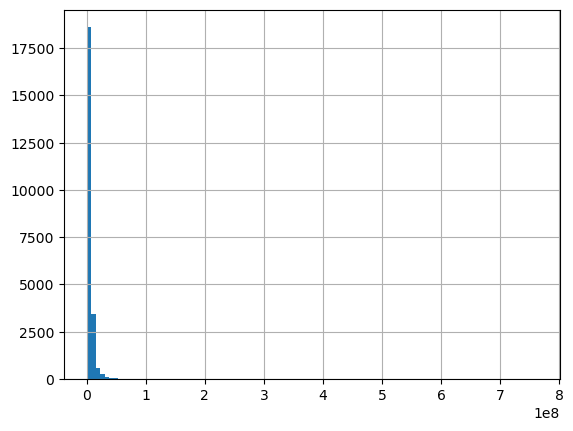

In [216]:
data['last_price'].hist(bins=100)

<Axes: >

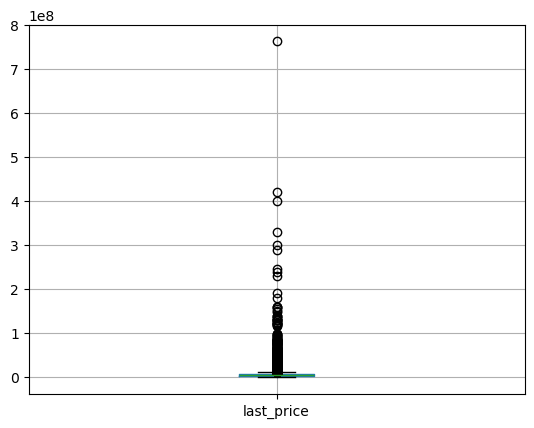

In [217]:
data.boxplot('last_price')

Получаем срез данных со стоимостью меньше 1 миллиона 

Get a slice of data with a price of less than 1 million.



In [219]:
data.query('last_price < 1000000')[['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor_type', 'floors_total', 'parks_nearest', 'city_centers_nearest']]

total_area  living_area  kitchen_area  last_price  rooms  \
164          40.3    22.723075      7.549786    800000.0      2   
247          31.0    17.479288      5.807528    650000.0      1   
259          30.0    15.000000      5.000000    900000.0      1   
268          46.0    30.000000      7.000000    650000.0      2   
293          42.8    32.000000      5.000000    900000.0      2   
...           ...          ...           ...         ...    ...   
23067        31.8    20.000000      7.000000    600000.0      1   
23153        41.0    28.000000      6.000000    650000.0      2   
23354        42.6    28.000000      9.000000    900000.0      2   
23484        44.5    28.000000      7.500000    470000.0      2   
23643        45.0    31.000000      6.000000    660000.0      2   

       ceiling_height floor_type  floors_total  parks_nearest  \
164              2.65     первый           3.0            NaN   
247              2.50     первый           3.0            NaN   
259              2.50     другой           5.0            NaN   
268              2.50  последний           5.0            NaN   
293              2.55  последний           5.0            NaN   
...               ...        ...           ...            ...   
23067            2.55     первый           2.0            NaN   
23153            3.90     первый           3.0            NaN   
23354            2.70     первый           2.0            NaN   
23484            2.50  последний           2.0            NaN   
23643            2.50     другой           5.0            NaN   

       city_centers_nearest  
164                     NaN  
247                     NaN  
259                     NaN  
268                     NaN  
293                     NaN  
...                     ...  
23067                   NaN  
23153                   NaN  
23354                   NaN  
23484                   NaN  
23643                   NaN  

[223 rows x 10 columns]

Умножает значенения меньше 1 миллиона в столбце last_price на 10

Multiply values less than 1 million in the last_price column by 10.



In [221]:
data.loc[data['last_price'] < 1000000, 'last_price'] *= 10

In [222]:
data['last_price'].describe()

count    2.320600e+04
mean     6.634849e+06
std      1.090663e+07
min      1.219000e+05
25%      3.500000e+06
50%      4.700000e+06
75%      6.900000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<Axes: >

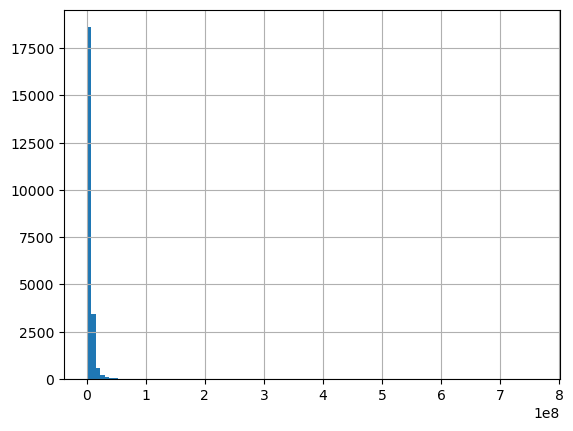

In [223]:
data['last_price'].hist(bins=100)

<Axes: >

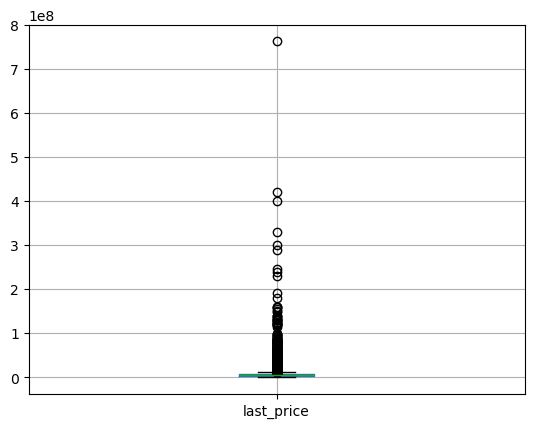

In [224]:
data.boxplot('last_price')

Получаем срез данных, содержащих выбросы 

Get a slice of data containing outliers.



In [226]:
Q3lp, Q1lp = np.percentile(data['last_price'], [75 ,25])

In [227]:
IQR = Q3lp - Q1lp

In [228]:
lower_bound = Q1lp - 1.5 * IQR

In [229]:
upper_bound = Q3lp + 1.5 * IQR

In [230]:
outliers_last_price = data[(data['last_price'] < lower_bound) | (data['last_price'] > upper_bound)]

In [231]:
outliers_last_price['last_price'].describe()

count    1.915000e+03
mean     2.511745e+07
std      3.183003e+07
min      1.203600e+07
25%      1.390000e+07
50%      1.700000e+07
75%      2.500000e+07
max      7.630000e+08
Name: last_price, dtype: float64

In [232]:
outliers_last_price[['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor_type', 'floors_total', 'parks_nearest', 'city_centers_nearest', 'locality_name']]

total_area  living_area  kitchen_area  last_price  rooms  \
0           108.0    51.000000     25.000000  13000000.0      3   
3           159.0    89.651834     29.786996  64900000.0      3   
19          121.0    76.000000     12.000000  14200000.0      3   
35          149.0   104.000000     17.000000  15500000.0      5   
42          161.8    80.900000     17.600000  22000000.0      4   
...           ...          ...           ...         ...    ...   
23559       108.6    70.600000     10.300000  13800000.0      3   
23587        88.0    49.618625     14.000000  12100000.0      3   
23608        80.0    44.100000     11.000000  14000000.0      3   
23631       104.0    66.000000     14.000000  14799000.0      3   
23684       145.0    71.400000     15.600000  21400000.0      4   

       ceiling_height floor_type  floors_total  parks_nearest  \
0                2.70     другой          16.0          482.0   
3                2.70     другой          14.0           84.0   
19               2.75     другой          16.0            NaN   
35               2.70     другой           5.0            NaN   
42               2.80     другой           4.0           47.0   
...               ...        ...           ...            ...   
23559            2.70     другой          19.0            NaN   
23587            2.70     другой          10.0          392.0   
23608            2.70     другой          11.0          518.0   
23631            3.10     другой           4.0            NaN   
23684            3.00     другой          26.0            NaN   

       city_centers_nearest    locality_name  
0                   16028.0  санкт-петербург  
3                    6800.0  санкт-петербург  
19                  12843.0  санкт-петербург  
35                   3502.0  санкт-петербург  
42                  30605.0         петергоф  
...                     ...              ...  
23559                4844.0  санкт-петербург  
23587                8370.0  санкт-петербург  
23608               11710.0  санкт-петербург  
23631               13944.0  санкт-петербург  
23684               11459.0  санкт-петербург  

[1915 rows x 11 columns]

In [233]:
filtered_last_price = data.drop(outliers_last_price.index)

In [234]:
filtered_last_price['last_price'].describe()

count    2.129100e+04
mean     4.972447e+06
std      2.253917e+06
min      1.219000e+05
25%      3.400000e+06
50%      4.500000e+06
75%      6.150000e+06
max      1.200000e+07
Name: last_price, dtype: float64

<Axes: >

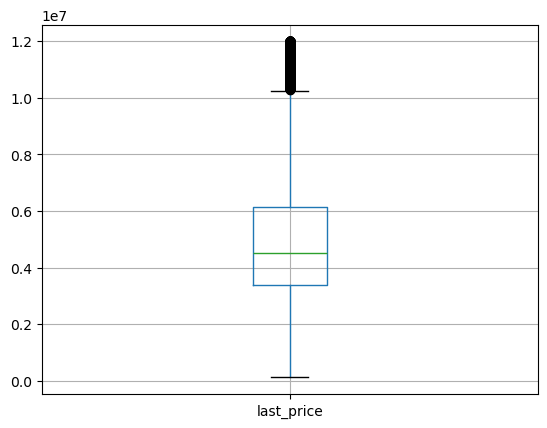

In [235]:
filtered_last_price.boxplot('last_price')

<Axes: >

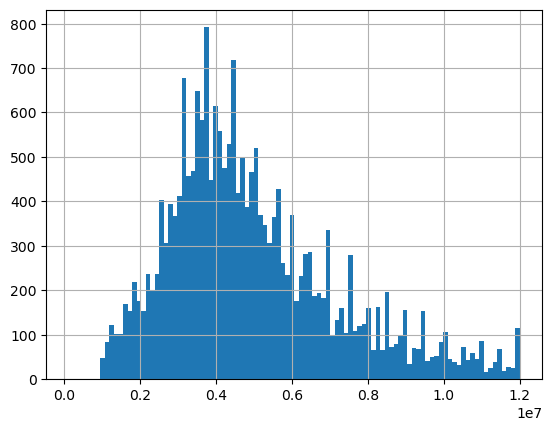

In [236]:
filtered_last_price['last_price'].hist(bins=100)

##### Анализ параметра: количество комнат

Parameter Analysis: Number of Rooms



In [238]:
data['rooms'].describe()

count    23206.000000
mean         2.090968
std          1.065916
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<Axes: >

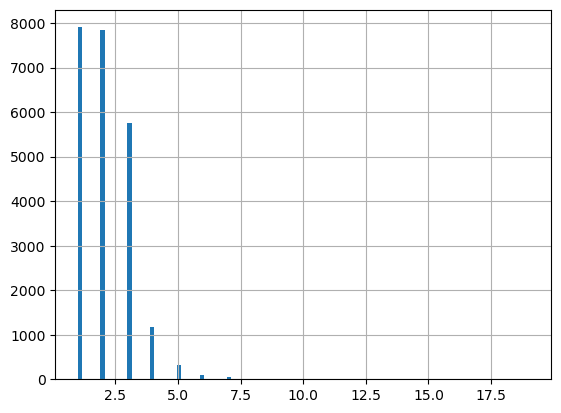

In [239]:
data['rooms'].hist(bins=100)

<Axes: >

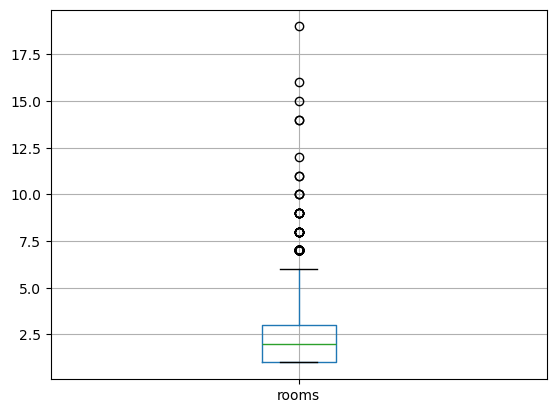

In [240]:
data.boxplot('rooms')

Судя по приведенным данным столбе не имеет аномалий 

Judging by the provided data, the column does not have anomalies.



##### Анализ параметра: высота потолков

Parameter Analysis: Ceiling Height



In [243]:
data['ceiling_height'].describe()

count    23206.000000
mean         2.728559
std          0.972770
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

<Axes: >

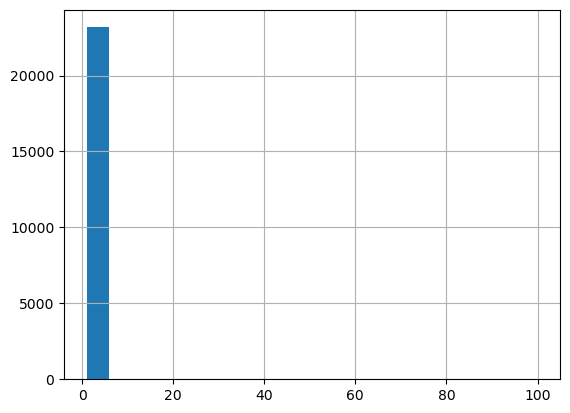

In [244]:
data['ceiling_height'].hist(bins=20)

<Axes: >

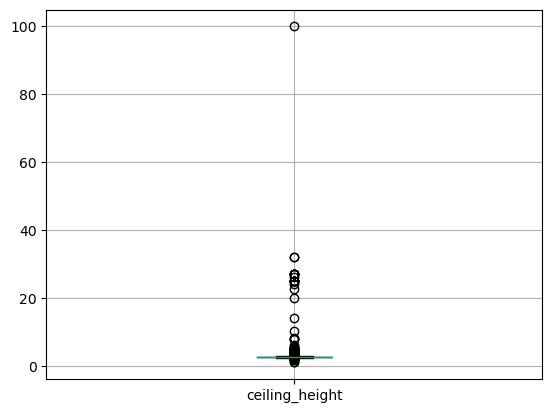

In [245]:
data.boxplot('ceiling_height')

В столбце 'ceiling_height' есть заметные выбросы. Выводим строки, в которых высота потолковпревышает 9 метров

The ceiling_height column has noticeable outliers. Output the rows where the ceiling height exceeds 9 meters.



In [247]:
data.query('ceiling_height >9')

total_images  last_price  total_area first_day_exposition  rooms  \
355              17   3600000.0        55.2           2018-07-12      2   
2158             15   1500000.0        42.0           2017-12-23      2   
3148             14   2900000.0        75.0           2018-11-12      3   
4643              0   4300000.0        45.0           2018-02-01      2   
5076              0   3850000.0        30.5           2018-10-03      1   
5246              0   2500000.0        54.0           2017-10-13      2   
5669              4   4400000.0        50.0           2017-08-08      2   
5807             17   8150000.0        80.0           2019-01-09      2   
6246              6   3300000.0        44.4           2019-03-25      2   
9379              5   3950000.0        42.0           2017-03-26      3   
10773             8   3800000.0        58.0           2017-10-13      2   
11285             0   1950000.0        37.0           2019-03-20      1   
14382             9   1700000.0        35.0           2015-12-04      1   
15061            19   5600000.0        56.4           2018-05-11      2   
17496            15   6700000.0        92.9           2019-02-19      3   
17857             1   3900000.0        56.0           2017-12-22      3   
18545             6   3750000.0        43.0           2019-03-18      2   
20478            11   8000000.0        45.0           2017-07-18      1   
20507            12   5950000.0        60.0           2018-02-19      2   
22309            20   5300000.0        45.0           2017-09-30      1   
22336            19   9999000.0        92.4           2019-04-05      2   
22869             0  15000000.0        25.0           2018-07-25      1   
22938            14   4000000.0        98.0           2018-03-15      4   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
355              25.0           5.0         32.0      2         False  ...   
2158             27.0           2.0         29.0      2         False  ...   
3148             32.0           3.0         53.0      2         False  ...   
4643             25.0           9.0         30.0      2         False  ...   
5076             24.0           5.0         19.5      1          True  ...   
5246             27.0           5.0         30.0      3         False  ...   
5669             26.0           9.0         21.3      3         False  ...   
5807             27.0          36.0         41.0     13         False  ...   
6246             25.0           5.0         31.3      5         False  ...   
9379             25.0           5.0         30.0      2         False  ...   
10773            27.0          10.0         30.1      3         False  ...   
11285            25.0           5.0         17.0      4         False  ...   
14382            25.0           5.0         20.0      2         False  ...   
15061            14.0          14.0         32.4      5         False  ...   
17496            20.0          17.0         53.2     14         False  ...   
17857            27.0           5.0         33.0      4         False  ...   
18545            25.0           5.0         29.0      3         False  ...   
20478            27.0           4.0         22.0      2         False  ...   
20507            22.6          14.0         35.0     11         False  ...   
22309            10.3          16.0         15.5     15         False  ...   
22336            32.0           6.0         55.5      5         False  ...   
22869           100.0           5.0         14.0      5          True  ...   
22938            27.0           2.0         73.0      2          True  ...   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
355              NaN               NaN            NaN            259.0   
2158             NaN               NaN            NaN              NaN   
3148             NaN               NaN            NaN              NaN   
4643           658.0               1.

Вероятно, часть выбросов обусловлена смеещением запятой вправо при заполнении пользователем данных о недвижимости. Разделим эти строки на 10, чтобы сделать эту часть данных более реалистичной. 

Probably, some outliers are due to the comma being shifted to the right when the user filled in the real estate data. Divide these rows by 10 to make this part of the data more realistic.



In [249]:
data.loc[data['ceiling_height'] >= 10, 'ceiling_height'] /= 10

В столбце есть значения существенно меньше 2 метров, что неправдоподобно низко. Выведем строки со значениями меньше 2 метров 

In the column, there are values significantly less than 2 meters, which is implausibly low. Let's output the rows with values less than 2 meters.

In [251]:
data.query('ceiling_height < 2')[['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor_type', 'floors_total', 'parks_nearest', 'city_centers_nearest']]

total_area  living_area  kitchen_area  last_price  rooms  \
5712         42.8         27.5      5.200000   1500000.0      2   
15061        56.4         32.4      9.100000   5600000.0      2   
16934        40.0         17.4      8.340000   4100000.0      1   
22309        45.0         15.5      8.430282   5300000.0      1   
22590        55.0         32.4     10.000000   6000000.0      2   

       ceiling_height floor_type  floors_total  parks_nearest  \
5712             1.20     первый           2.0            NaN   
15061            1.40     другой          14.0            NaN   
16934            1.75     другой          37.0            NaN   
22309            1.03     другой          16.0          440.0   
22590            1.00     другой          12.0          293.0   

       city_centers_nearest  
5712                    NaN  
15061               13610.0  
16934               20444.0  
22309               11936.0  
22590               14217.0

Маловероятно, что потолок может быть высотой 1 метр. Удалим все значения меньше 2 метров 

It is unlikely that a ceiling can be 1 meter high. Remove all values less than 2 meters.



In [253]:
data = data.query('ceiling_height >= 2')

In [254]:
data['ceiling_height'].describe()

count    23201.000000
mean         2.703856
std          0.241209
min          2.000000
25%          2.550000
50%          2.700000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

<Axes: >

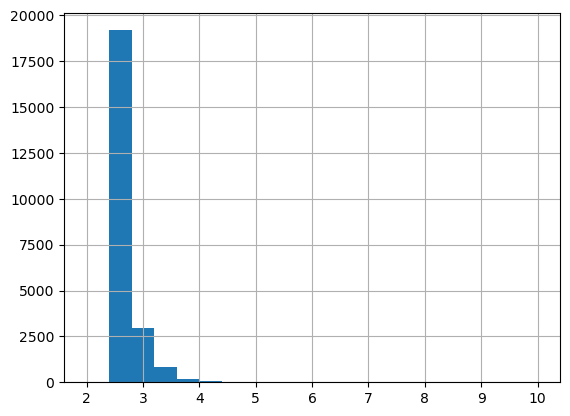

In [255]:
data['ceiling_height'].hist(bins=20)

<Axes: >

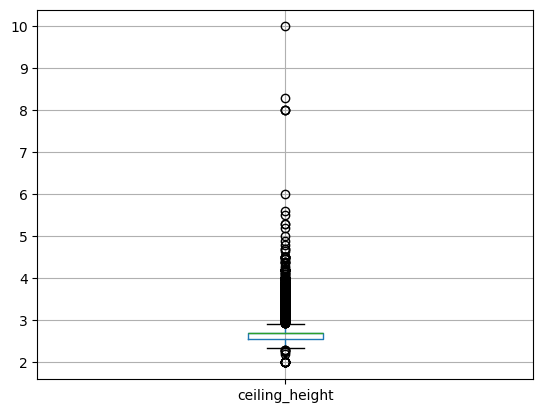

In [256]:
data.boxplot('ceiling_height')

Определяем срез данных содеражащих выбросы. 

Determine a slice of data containing outliers.



In [258]:
Q3ch, Q1ch = np.percentile(data['ceiling_height'], [75 ,25])

In [259]:
IQR = Q3ch - Q1ch

In [260]:
lower_bound = Q1ch - 1.5 * IQR

In [261]:
upper_bound = Q3ch + 1.5 * IQR

In [262]:
outliers_ceiling_height = data[(data['ceiling_height'] < lower_bound) | (data['ceiling_height'] > upper_bound)]

In [263]:
outliers_ceiling_height[['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor_type', 'floors_total', 'parks_nearest', 'city_centers_nearest', 'locality_name']]

total_area  living_area  kitchen_area  last_price  rooms  \
4          100.00    32.000000         41.00  10000000.0      2   
16          82.00    55.600000          9.00   6700000.0      3   
43          48.00    28.000000          7.50   9330000.0      2   
51         161.00    38.000000         50.00  45000000.0      3   
52         136.00    94.000000         11.00  11795000.0      6   
...           ...          ...           ...         ...    ...   
23668       47.00    27.000000          9.00   6000000.0      2   
23684      145.00    71.400000         15.60  21400000.0      4   
23688      101.00    63.000000         15.00   9200000.0      3   
23694      133.81    73.300000         13.83   9700000.0      3   
23697       76.75    43.275335         23.30  11475000.0      2   

       ceiling_height floor_type  floors_total  parks_nearest  \
4                3.03     другой          14.0          112.0   
16               3.05     первый           5.0          420.0   
43               3.00  последний           4.0            NaN   
51               3.20     другой           8.0            NaN   
52               3.00  последний           2.0          526.0   
...               ...        ...           ...            ...   
23668            3.00     другой           5.0          238.0   
23684            3.00     другой          26.0            NaN   
23688            3.05     другой          15.0            NaN   
23694            3.70     другой           5.0          796.0   
23697            3.00     другой          17.0          173.0   

       city_centers_nearest    locality_name  
4                    8098.0  санкт-петербург  
16                  10698.0  санкт-петербург  
43                  10822.0  санкт-петербург  
51                   6589.0  санкт-петербург  
52                   6582.0  санкт-петербург  
...                     ...              ...  
23668                9167.0  санкт-петербург  
23684               11459.0  санкт-петербург  
23688               14428.0  санкт-петербург  
23694                4232.0  санкт-петербург  
23697               10364.0  санкт-петербург  

[2674 rows x 11 columns]

In [264]:
filtered_ceiling_height = data.drop(outliers_ceiling_height.index)

In [265]:
filtered_ceiling_height['ceiling_height'].describe()

count    20527.000000
mean         2.638888
std          0.098105
min          2.340000
25%          2.550000
50%          2.700000
75%          2.700000
max          2.920000
Name: ceiling_height, dtype: float64

<Axes: >

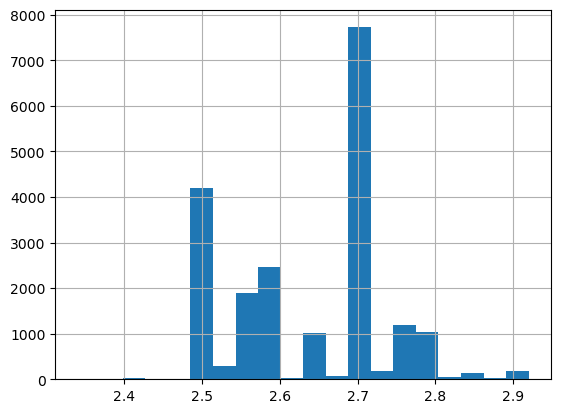

In [266]:
filtered_ceiling_height['ceiling_height'].hist(bins=20)

<Axes: >

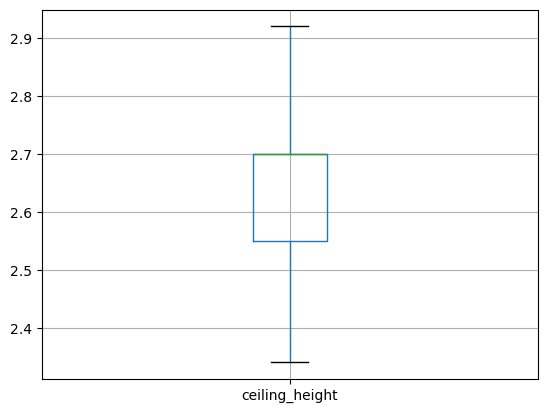

In [267]:
filtered_ceiling_height.boxplot('ceiling_height')

##### Проводим анализ параметра: тип этажа квартиры («первый», «последний», «другой»)

Conduct an analysis of the parameter: type of apartment floor (“first”, “last”, “other”).

In [269]:
data['floor_type'].describe()

count      23201
unique         3
top       другой
freq       17050
Name: floor_type, dtype: object

<Axes: >

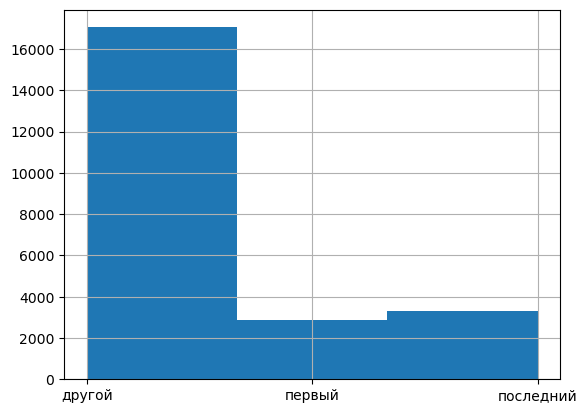

In [270]:
data['floor_type'].hist(bins=3)

По-видимому, чаще всего на продажу выставляли квартиры находящиеся на отличных от первого и полседнего этажа. 

Apparently, apartments located on floors other than the first and last were most frequently put up for sale.



##### Анализ параметра: общее количество этажей в доме

Parameter Analysis: Total Number of Floors in the Building


In [273]:
data['floors_total'].describe()

count    23201.000000
mean        10.615749
std          6.556095
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<Axes: >

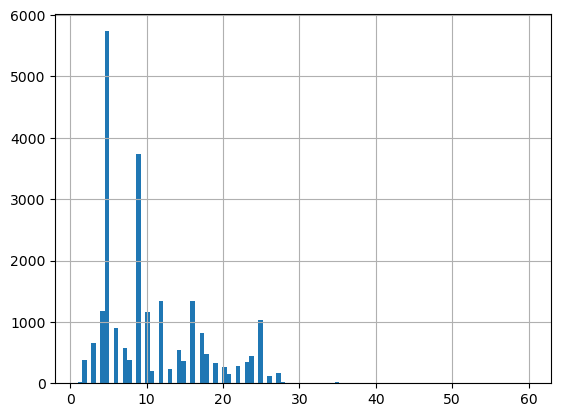

In [274]:
data['floors_total'].hist(bins=100)

<Axes: >

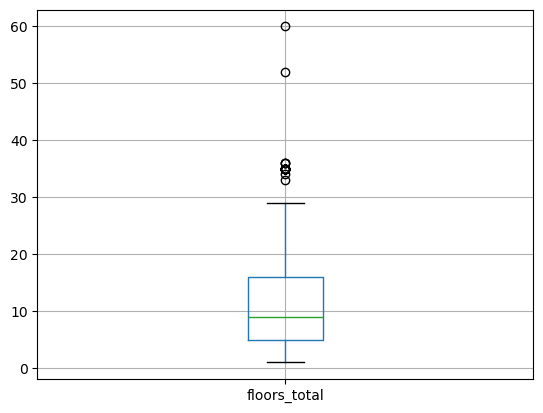

In [275]:
data.boxplot('floors_total')

In [276]:
Q3ft, Q1ft = np.percentile(data['floors_total'], [75 ,25])

In [277]:
IQR = Q3ft - Q1ft

In [278]:
lower_bound = Q1ft - 1.5 * IQR

In [279]:
upper_bound = Q3ft + 1.5 * IQR

In [280]:
outliers_floors_total = data[(data['floors_total'] < lower_bound) | (data['floors_total'] > upper_bound)]

In [281]:
outliers_floors_total[['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor_type', 'floors_total', 'parks_nearest', 'city_centers_nearest', 'locality_name']]

total_area  living_area  kitchen_area  last_price  rooms  \
397          54.0         21.4     18.700000   5990000.0      2   
871          75.0         40.5     11.700000   7777777.0      2   
1697         28.0         18.0      5.245509   3550000.0      1   
1917         74.0         34.4     13.000000  10150000.0      2   
2253         45.5         27.4      7.400000   3800000.0      2   
2966         37.0         14.0     10.400000   4300000.0      1   
4855         50.0         22.0     13.000000   5500000.0      1   
5807         80.0         41.0     12.000000   8150000.0      2   
5808         43.0         14.0     15.000000   4590000.0      1   
7236         42.0         15.0     11.000000   4599000.0      1   
8496         73.3         28.0     23.100000   7500000.0      3   
9186         49.1         31.0      7.000000   6500000.0      1   
9370         70.0         28.0     23.000000   7390000.0      2   
11079        75.0         40.0     12.000000   9200000.0      2   
11575       101.0         53.0     21.000000   9900000.0      3   
12888        70.0         36.5     23.100000   7600000.0      3   
12960        54.0         26.6     19.100000   6140000.0      2   
13975        65.0         32.1      8.900000   6990000.0      2   
14347        69.7         27.4     23.300000   8595000.0      2   
15982        62.0         34.0     10.000000   5900000.0      2   
16731        40.0         10.5     14.000000   3978000.0      1   
18218       101.0         53.4     13.700000   9900000.0      3   
18617        68.5         27.0     23.000000   7350000.0      2   
18629        54.0         21.0     18.000000   5700000.0      1   
20938       100.9         53.4     13.400000   9900000.0      3   
21599        51.0         27.0     19.000000   6200000.0      2   
21809        77.0         39.0     14.000000  10600000.0      2   
22946        75.0         40.0     15.000000   7690000.0      2   

       ceiling_height floor_type  floors_total  parks_nearest  \
397              2.70     другой          36.0            NaN   
871              2.70     другой          35.0            NaN   
1697             2.65     другой          34.0            NaN   
1917             2.80     другой          35.0            NaN   
2253             2.88     другой          60.0          342.0   
2966             2.70     другой          35.0            NaN   
4855             2.80     другой          35.0          609.0   
5807             2.70     другой          36.0            NaN   
5808             2.70     другой          35.0            NaN   
7236             2.70     другой          35.0            NaN   
8496             2.70     другой          35.0            NaN   
9186             2.50     другой          35.0            NaN   
9370             2.70     другой          35.0            NaN   
11079            2.70     другой          36.0            NaN   
11575            2.70     другой          33.0            NaN   
12888            2.70     другой          35.0            NaN   
12960            2.70     другой          35.0            NaN   
13975            2.70     другой          35.0            NaN   
14347            2.70     другой          35.0            NaN   
15982            2.70     другой          35.0            NaN   
16731            2.65     другой          52.0          793.0   
18218            2.70     другой          35.0            NaN   
18617            2.70     другой          35.0          609.0   
18629            2.70     другой          35.0            NaN   
20938            2.70     другой          35.0            NaN   
21599            2.70     другой          35.0            NaN   
21809            2.70     другой          35.0            NaN   
22946            2.70     другой          35.0            NaN   

       city_centers_nearest    locality_name  
397                 20444.0  санкт-петербург  
871                 20444.0  санкт-петербург  
1697                20444.0  санкт-п

In [282]:
filtered_floors_total = data.drop(outliers_floors_total.index)

In [283]:
filtered_floors_total['floors_total'].describe()

count    23173.000000
mean        10.584473
std          6.495128
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         29.000000
Name: floors_total, dtype: float64

<Axes: >

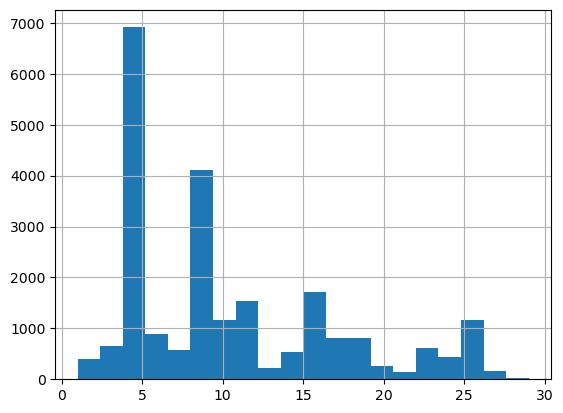

In [284]:
filtered_floors_total['floors_total'].hist(bins=20)

<Axes: >

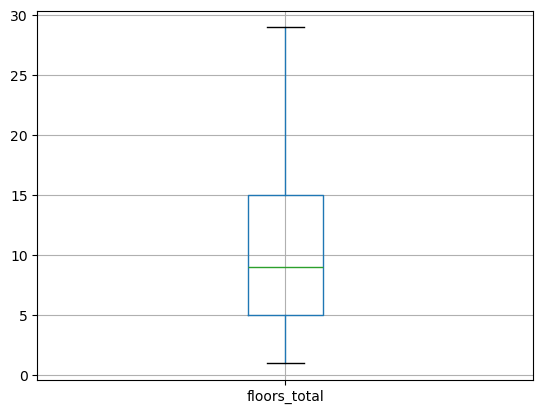

In [285]:
filtered_floors_total.boxplot('floors_total')

##### Анализа параметра: расстояние до центра города в метрах

Parameter Analysis: Distance to the City Center in Meters


In [287]:
data['city_centers_nearest'].describe()

count    17830.000000
mean     14210.369141
std       8636.571289
min        181.000000
25%       9238.750000
50%      13094.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

<Axes: >

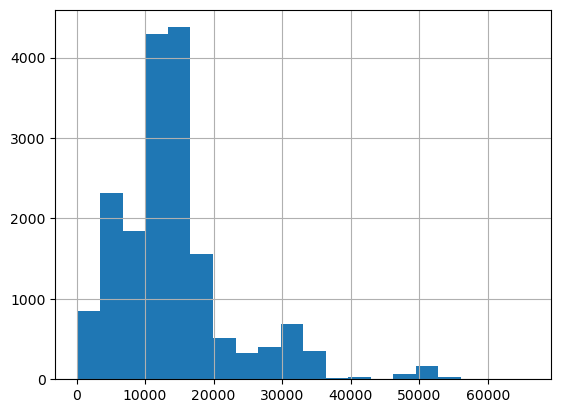

In [288]:
data['city_centers_nearest'].hist(bins=20)

<Axes: >

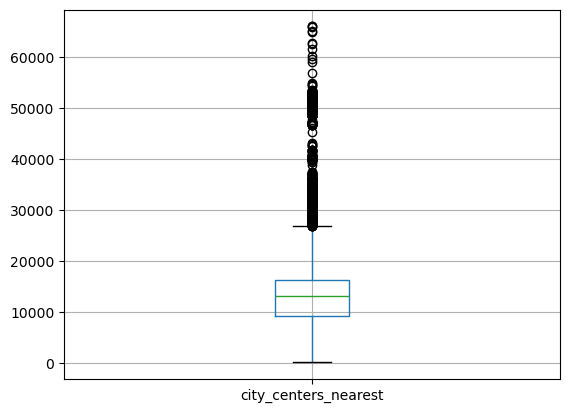

In [289]:
data.boxplot('city_centers_nearest')

Есть очевидные выбросы и данные с очень большим расстоянием до центра города. Вероятно, речь идет о небольших поселенияз по типу поселка или дервни, а в датафрейме указано расстойние до центра ближайшего города. Если это так, то эти данные никак не иллюстрируют раскрывают этот показатель. 

Выявим выбросы и отфильтруем данные, чтобы потом ими было поьзоваться. 

There are obvious outliers and data with very large distances to the city center. These likely refer to small settlements such as villages or towns, and the dataframe indicates the distance to the center of the nearest city. If this is the case, these data do not illustrate this parameter.

We will identify the outliers and filter the data to use them later.



In [291]:
Q3cnn, Q1cnn = np.percentile(data['city_centers_nearest'], [75 ,25])

In [292]:
IQR = Q3cnn - Q1cnn

In [293]:
lower_bound = Q1cnn - 1.5 * IQR

In [294]:
upper_bound = Q3cnn + 1.5 * IQR

In [295]:
outliers_city_centers_nearest = data[(data['city_centers_nearest'] < lower_bound) | (data['city_centers_nearest'] > upper_bound)]

In [296]:
outliers_city_centers_nearest[['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor_type', 'floors_total', 'parks_nearest', 'city_centers_nearest', 'locality_name']]

Empty DataFrame
Columns: [total_area, living_area, kitchen_area, last_price, rooms, ceiling_height, floor_type, floors_total, parks_nearest, city_centers_nearest, locality_name]
Index: []

In [297]:
filtered_city_centers_nearest = data.drop(outliers_city_centers_nearest.index)

In [298]:
filtered_city_centers_nearest['city_centers_nearest'].describe()

count    17830.000000
mean     14210.369141
std       8636.571289
min        181.000000
25%       9238.750000
50%      13094.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

<Axes: >

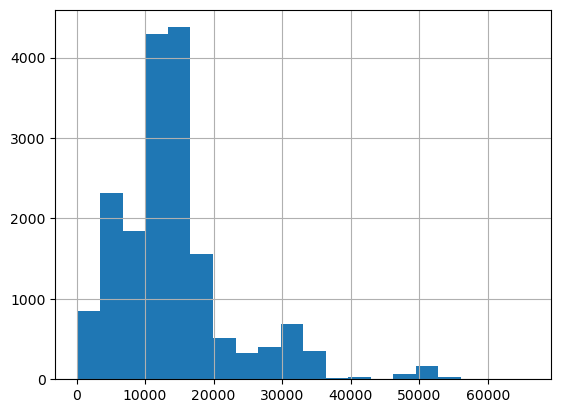

In [299]:
filtered_city_centers_nearest['city_centers_nearest'].hist(bins=20)

<Axes: >

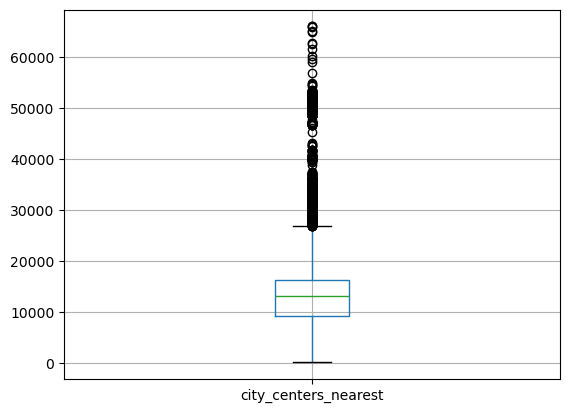

In [300]:
filtered_city_centers_nearest.boxplot('city_centers_nearest')

##### Анализа параметра: расстояние до ближайшего парка

Parameter Analysis: Distance to the Nearest Park


In [302]:
data['parks_nearest'].describe()

count    7954.000000
mean      490.514465
std       341.435333
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<Axes: >

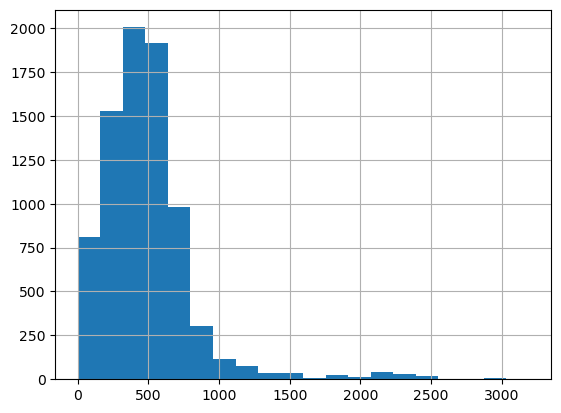

In [303]:
data['parks_nearest'].hist(bins=20)

<Axes: >

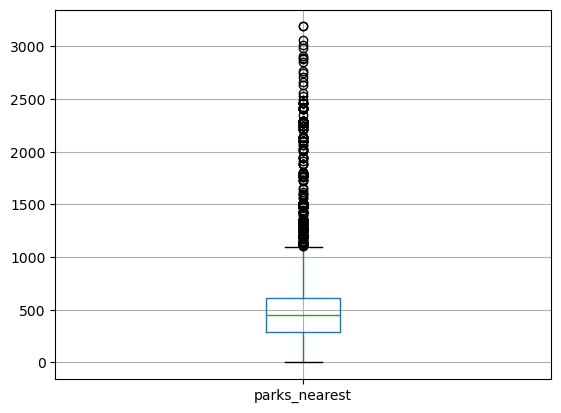

In [304]:
data.boxplot('parks_nearest')

In [305]:
Q3pn, Q1pn = np.percentile(data['parks_nearest'], [75 ,25])

In [306]:
IQR = Q3pn - Q1pn

In [307]:
lower_bound = Q1pn - 1.5 * IQR

In [308]:
upper_bound = Q3pn + 1.5 * IQR

In [309]:
outliers_parks_nearest = data[(data['parks_nearest'] < lower_bound) | (data['parks_nearest'] > upper_bound)]

In [310]:
outliers_parks_nearest[['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor_type', 'floors_total', 'parks_nearest', 'city_centers_nearest', 'locality_name']]

Empty DataFrame
Columns: [total_area, living_area, kitchen_area, last_price, rooms, ceiling_height, floor_type, floors_total, parks_nearest, city_centers_nearest, locality_name]
Index: []

In [311]:
filtered_parks_nearest = data.drop(outliers_parks_nearest.index)

In [312]:
filtered_parks_nearest['parks_nearest'].describe()

count    7954.000000
mean      490.514465
std       341.435333
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<Axes: >

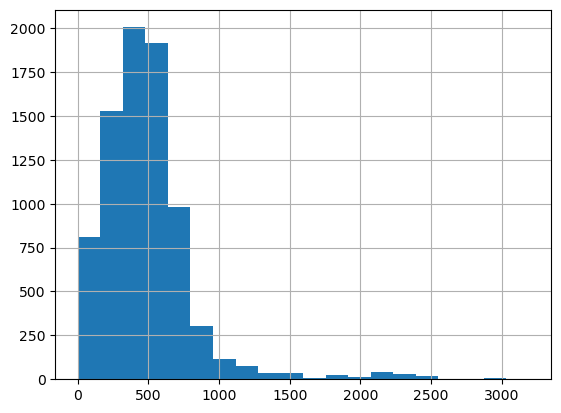

In [313]:
filtered_parks_nearest['parks_nearest'].hist(bins=20)

<Axes: >

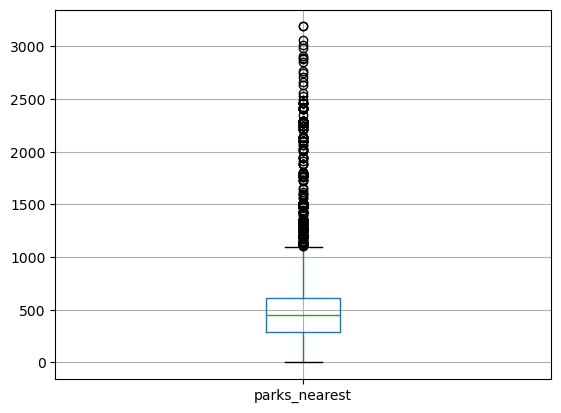

In [314]:
filtered_parks_nearest.boxplot('parks_nearest')

Проверим сколько строк дата датафрейма мы потеряли: 

Check how many rows we lost in the dataframe:



In [316]:
original_data

(23699, 22)

In [317]:
new_data_shape = data.shape

In [318]:
percentage_decrease = ((original_data[0] - new_data_shape[0]) / original_data[0]) * 100

In [319]:
f"DataFrame уменьшился на {percentage_decrease:.2f}%"

'DataFrame уменьшился на 2.10%'

DataFrame reduced by 2.10%

#### Анализ темпа продажи квартир 

 Analysis of Apartment Sales Speed

In [322]:
days_to_sell_apartments = data.query('days_exposition == days_exposition')

In [323]:
days_to_sell_apartments['days_exposition'].describe()

count    20061.000000
mean       181.642944
std        220.395187
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

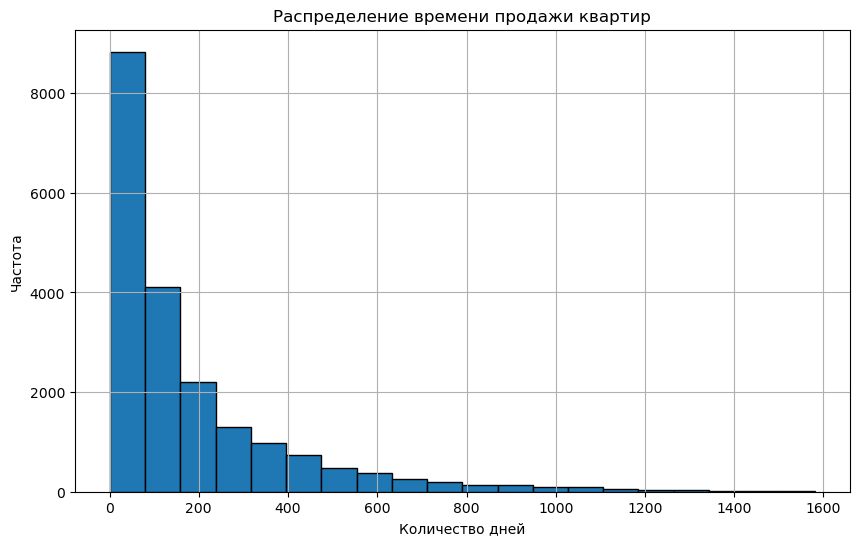

In [324]:
plt.figure(figsize=(10, 6))
plt.hist(days_to_sell_apartments['days_exposition'], bins=20, edgecolor='black')
plt.title('Распределение времени продажи квартир')
plt.xlabel('Количество дней')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

<Axes: >

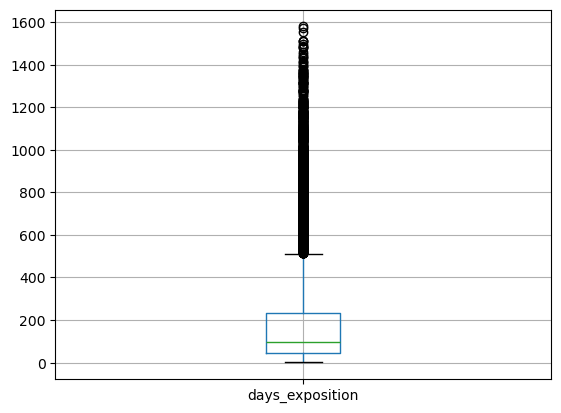

In [325]:
data.boxplot('days_exposition')

In [326]:
mean_days = days_to_sell_apartments['days_exposition'].mean()
median_days = days_to_sell_apartments['days_exposition'].median()

In [327]:
f"Среднее время продажи: {mean_days:.2f} дней"

'Среднее время продажи: 181.64 дней'

Average sales time: 181.64 days

In [329]:
f"Медианное время продажи: {median_days} дней"

'Медианное время продажи: 96.0 дней'

Median sales time: 96.0 days

Обычное время продажи: Исходя из полученных данных, можно сказать, что обычно продажа квартиры занимает несколько месяцев (от 90 до 180 дней).

Быстрые продажи: Продажи с длительностью до 45 дней можно считать быстрыми.

Необычно долгие продажи: Продажи, которые длительностью более 232 дней (и особенно свыше 360 дней), можно считать необычно долгими. Такие случаи требуют дополнительного анализа для понимания причин задержки продажи.

Typical sales time: Based on the obtained data, it can be said that the typical sales time for an apartment is several months (from 90 to 180 days).

Quick sales: Sales with a duration of up to 45 days can be considered quick.

Unusually long sales: Sales lasting more than 232 days (and especially more than 360 days) can be considered unusually long. Such cases require additional analysis to understand the reasons for the delay in sales.

<Axes: >

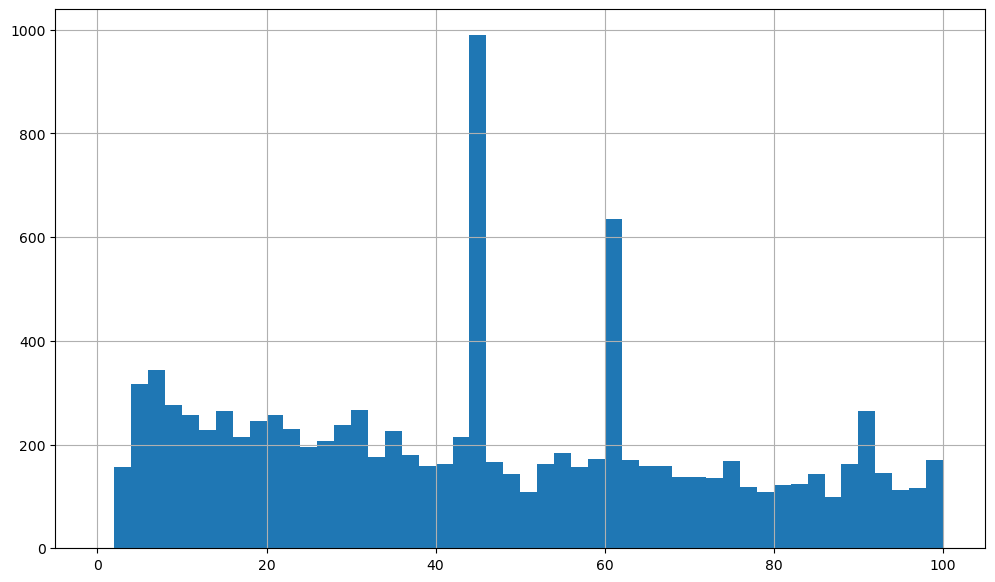

In [332]:
# Код ревьюера
data['days_exposition'].hist(bins=50, range=(0,100), figsize=(12, 7))

#### Анализ факторов влияющих на стоимость квартир 

Analysis of Factors Influencing Apartment Prices

Список фаторов: 
* общей площади;
* жилой площади;
* площади кухни;
* количества комнат;
* этажа, на котором расположена квартира (первый, последний, другой);
* даты размещения (день недели, месяц, год).

List of Factors:

* Total area
* Living area
* Kitchen area
* Number of rooms
* Floor on which the apartment is located (first, last, other)
* Publication date (day of the week, month, year)

<Axes: xlabel='last_price', ylabel='total_area'>

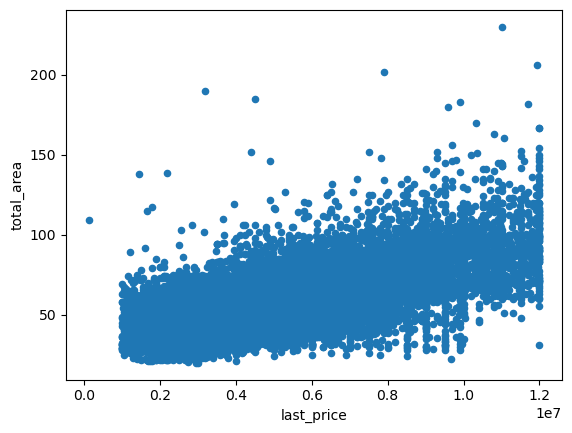

In [335]:
filtered_last_price.plot(x='last_price', y='total_area', kind='scatter') 

In [336]:
filtered_last_price['last_price'].corr(filtered_last_price['total_area'])

0.6870758037277891

Как правило, увеличение общей площади ведет к увеличению цены. На графике это проявляется в виде восходящего тренда. Это подтверждается положительным значением коэффициента корреляции заметно превыщающим нулевое значение. 

Generally, an increase in total area leads to an increase in price. This is reflected in the graph as an upward trend. This is confirmed by a positive correlation coefficient significantly exceeding zero.



<Axes: xlabel='last_price', ylabel='living_area'>

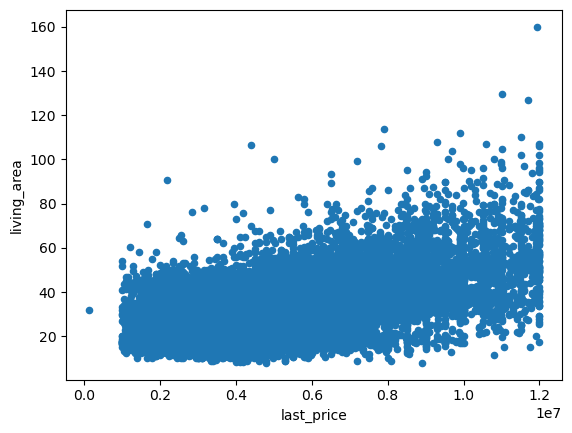

In [338]:
filtered_last_price.plot(x='last_price', y='living_area', kind='scatter') 

In [339]:
filtered_last_price['last_price'].corr(filtered_last_price['living_area'])

0.5811859352170009

Аналогично общей площади, увеличение жилой площади также ведет к увеличению цены. Коэффициент корреляции указывает на положительную связь этих двух параметро. 

Similar to the total area, an increase in living area also leads to an increase in price. The correlation coefficient indicates a positive relationship between these two parameters.



<Axes: xlabel='last_price', ylabel='kitchen_area'>

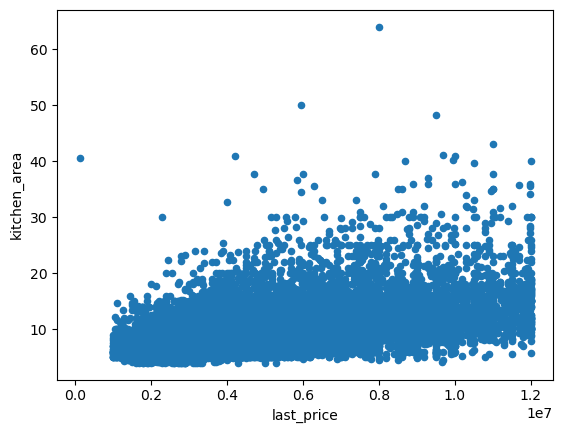

In [341]:
filtered_last_price.plot(x='last_price', y='kitchen_area', kind='scatter') 

In [342]:
filtered_last_price['last_price'].corr(filtered_last_price['kitchen_area'])

0.4917019414231209

Более просторные кухни могут быть признаком более высоких цен на квартиры. Коэффициент корреляциия подтверждает положительную связь двух параметро. 

More spacious kitchens may indicate higher apartment prices. The correlation coefficient confirms a positive relationship between the two parameters.



<Axes: xlabel='last_price', ylabel='rooms'>

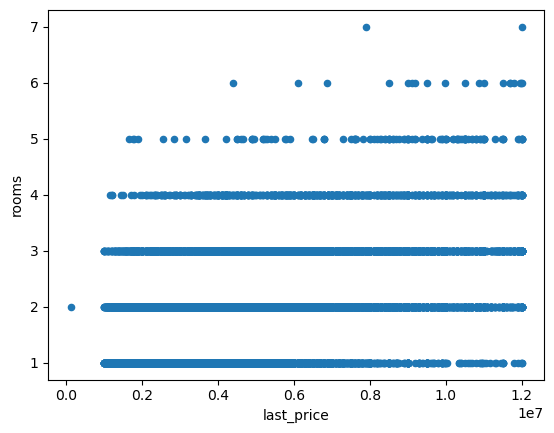

In [344]:
filtered_last_price.plot(x='last_price', y='rooms', kind='scatter') 

In [345]:
filtered_last_price['last_price'].corr(filtered_last_price['rooms'])

0.4454159282749415

Квартиры с большим количеством комнат обычно стоят дороже. Это связано с тем, что квартиры с большим числом комнат часто обладают большей площадью и предоставляют больше удобств, что делает их более привлекательными для семей или тех, кто нуждается в дополнительном пространстве. На это также указывает положительное значение коэффициента корреляции (0.44597043175867723)

Apartments with more rooms are usually more expensive. This is because apartments with more rooms often have a larger area and provide more amenities, making them more attractive to families or those who need additional space. This is also indicated by a positive correlation coefficient (0.44597043175867723).



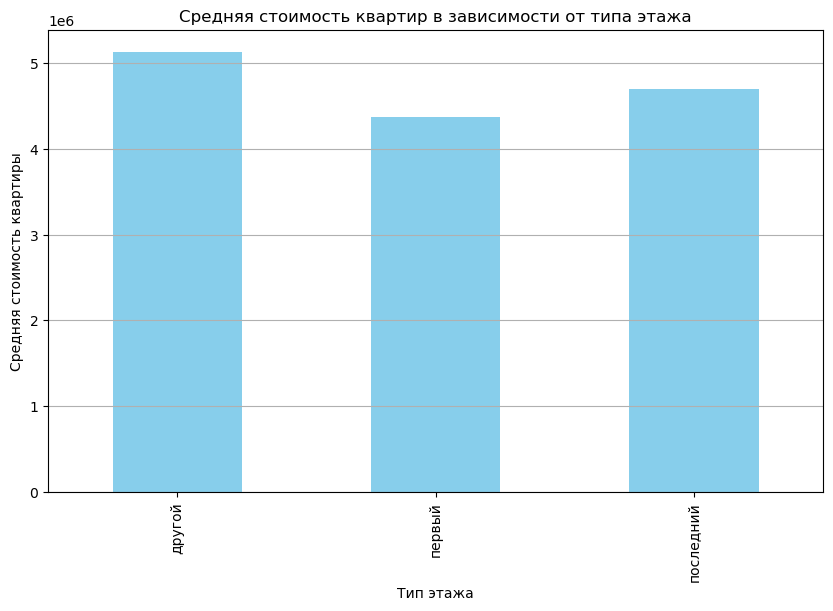

In [347]:
plt.figure(figsize=(10, 6))
filtered_last_price.groupby('floor_type')['last_price'].mean().plot(kind='bar', color='skyblue')
plt.title('Средняя стоимость квартир в зависимости от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Средняя стоимость квартиры')
plt.grid(axis='y')
plt.show()

Наибольшая средняя стоимость квартир на этажах отличных от первого и последнего. Средняя стоимость квартир на последнем этаже несколько ниже, но наименьшая все у квартир на первом этаже. 

The highest average cost of apartments is on floors other than the first and last. The average cost of apartments on the last floor is slightly lower, but the lowest is for apartments on the first floor.



<Axes: xlabel='last_price', ylabel='publication_weekday'>

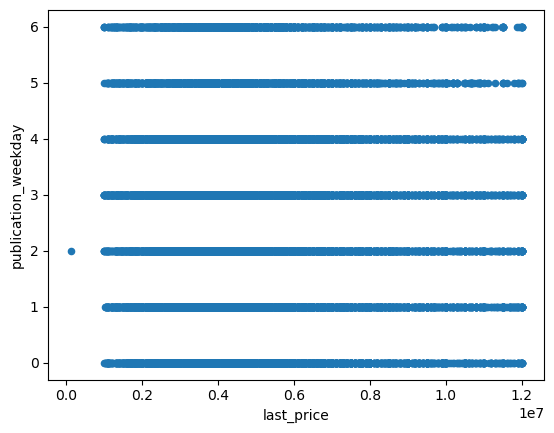

In [349]:
filtered_last_price.plot(x='last_price', y='publication_weekday', kind='scatter') 

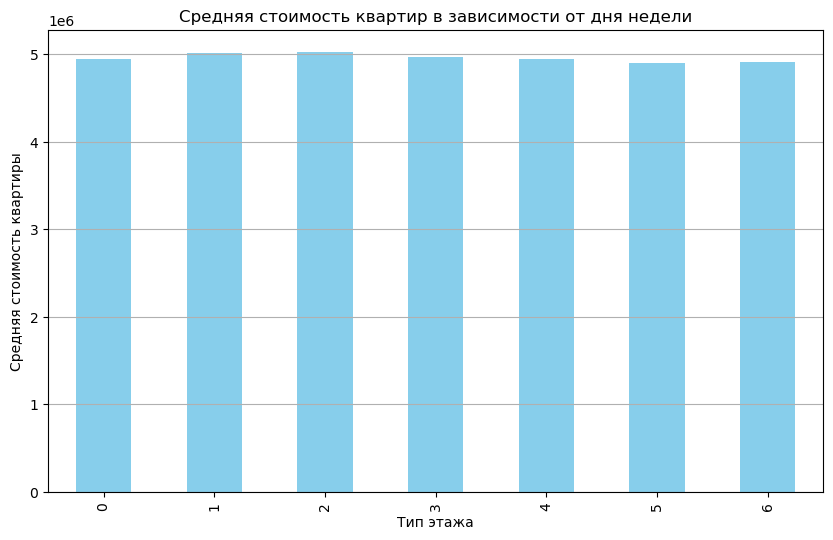

In [350]:
plt.figure(figsize=(10, 6))
filtered_last_price.groupby('publication_weekday')['last_price'].mean().plot(kind='bar', color='skyblue')
plt.title('Средняя стоимость квартир в зависимости от дня недели')
plt.xlabel('Тип этажа')
plt.ylabel('Средняя стоимость квартиры')
plt.grid(axis='y')
plt.show()

Cущественно связи между стоимостью квартиры и днем публикации объявления нет. 

There is no significant relationship between the apartment price and the day of the advertisement publication.



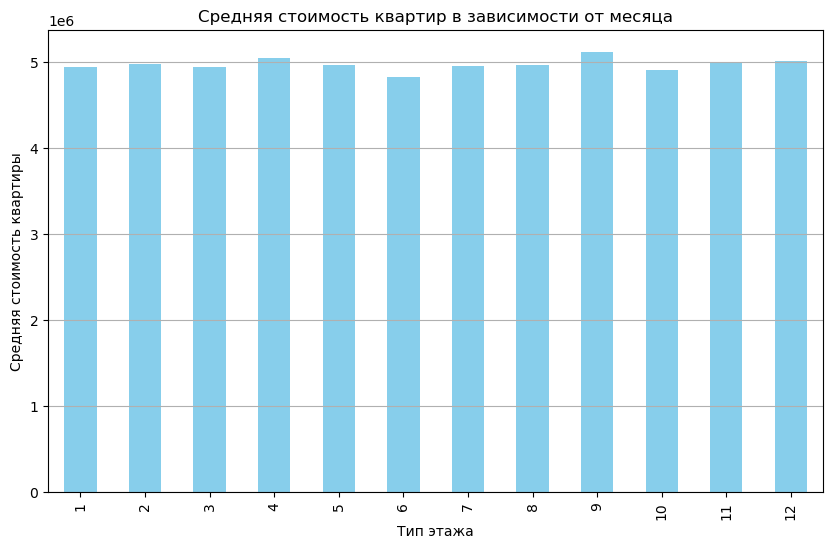

In [352]:
plt.figure(figsize=(10, 6))
filtered_last_price.groupby('publication_month')['last_price'].mean().plot(kind='bar', color='skyblue')
plt.title('Средняя стоимость квартир в зависимости от месяца')
plt.xlabel('Тип этажа')
plt.ylabel('Средняя стоимость квартиры')
plt.grid(axis='y')
plt.show()

Можно предположить, что существенно связи между стоимостью квартиры и месяцем публикации объявления нет. 

It can be assumed that there is no significant relationship between the apartment price and the month of the advertisement publication.



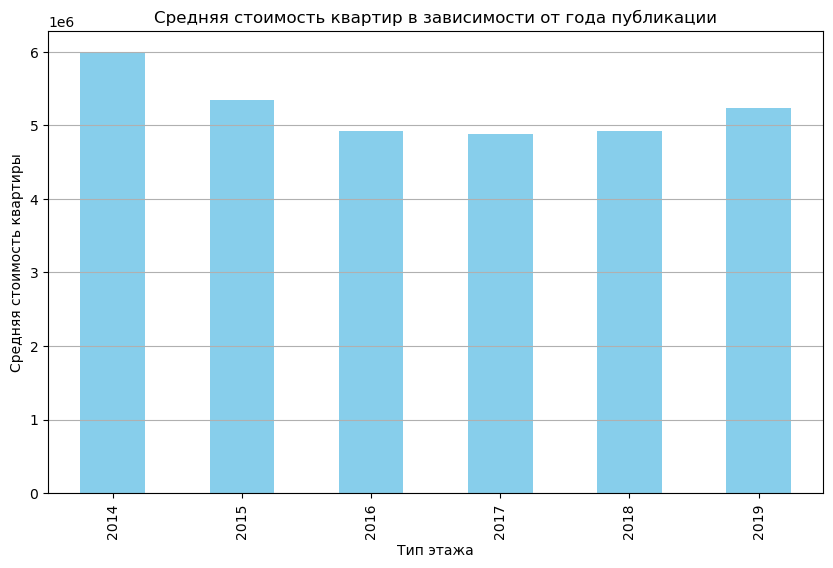

In [354]:
plt.figure(figsize=(10, 6))
filtered_last_price.groupby('publication_year')['last_price'].mean().plot(kind='bar', color='skyblue')
plt.title('Средняя стоимость квартир в зависимости от года публикации')
plt.xlabel('Тип этажа')
plt.ylabel('Средняя стоимость квартиры')
plt.grid(axis='y')
plt.show()

In [355]:
filtered_last_price['last_price'].corr(filtered_last_price['publication_year'])

0.0027116819329929564

Коэффициент корреляции близок к нулю (0.0031752094249518905), поэтому можно предположить, что существенно связи между стоимостью квартиры и годом публикации объявления нет. При этом как следуетиз графика средняя стоимость квартир в 2014 году была несколько выше, чем в сотальные годы. 

The correlation coefficient is close to zero (0.0031752094249518905), so it can be assumed that there is no significant relationship between the apartment price and the year of the advertisement publication. However, as shown in the graph, the average cost of apartments in 2014 was slightly higher than in other years.



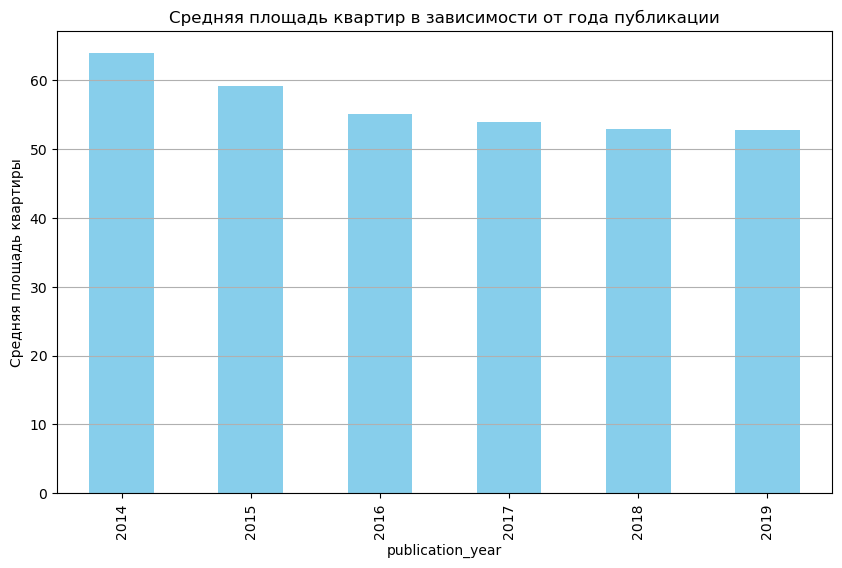

In [357]:
plt.figure(figsize=(10, 6))
filtered_last_price.groupby('publication_year')['total_area'].mean().plot(kind='bar', color='skyblue')
plt.title('Средняя площадь квартир в зависимости от года публикации')

plt.ylabel('Средняя площадь квартиры')
plt.grid(axis='y')
plt.show()

   Таким образом, наибольшее влияние на стоимость квартиры оказывают общая, жилая площадь и площадь кухни 

   Thus, the greatest influence on the apartment price is exerted by the total area, living area, and kitchen area.



#### Рассчитываем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений 

Calculate the Average Price per Square Meter in the 10 Localities with the Most Listings

Подсчитываем количество объявлений для каждого населённого пункта

Count the number of listings for each locality.



In [361]:
locality_counts = filtered_last_price['locality_name'].value_counts()

Отбираем 10 населённых пунктов с наибольшим количеством объявлений

Select the 10 localities with the highest number of listings.



In [363]:
top_10_localities = locality_counts.head(10).index

Фильтруем данные по отобранным населенным пунктам

Filter the data by the selected localities.



In [365]:
top_10_localities_filtered = filtered_last_price[filtered_last_price['locality_name'].isin(top_10_localities)]

Строим сводную таблицу

Create a pivot table.



In [367]:
top_10_localities_filtered_pivot = top_10_localities_filtered.pivot_table(
    index='locality_name',
    values=['last_price', 'total_area', 'price_per_sqm'],
    aggfunc={'last_price': 'count', 'price_per_sqm': 'mean'}
).rename(columns={'last_price': 'count', 'price_per_sqm': 'mean_price_per_sqm'})

In [368]:
top_10_localities_filtered_pivot

count  mean_price_per_sqm
locality_name                               
всеволожск           385        67115.535377
выборг               235        57944.472596
гатчина              301        68295.784252
деревня кудрово      279        92221.656774
колпино              335        75241.066985
поселок мурино       513        84818.491404
поселок парголово    321        90218.408847
поселок шушары       434        78272.899977
пушкин               338       100265.893757
санкт-петербург    13590       105378.106696

Населенный пункт с самой высокой средней стоимостью квадратного метра - Санкт-Петербург. 
Населенный пункт с самой низкой средней стоимостью квадратного метра - Выборг.

The locality with the highest average price per square meter is Saint Petersburg. The locality with the lowest average price per square meter is Vyborg.




#### Изучаем как стоимость объектов в Санкт-Петербурге зависит от расстояния до центра города в километрах 

Analyze How the Price of Objects in Saint Petersburg Depends on the Distance to the City Center in Kilometers

Фильтруем данные по столбцу locality_name. чтобы получить срез данных только для Санк-Петербурга 

Filter the data by the locality_name column to get a slice of data only for Saint Petersburg.



In [372]:
spb_apartments = filtered_last_price[filtered_last_price['locality_name'] == 'санкт-петербург']

Вычисление среднюю стоимость квадратного по каждому километру от центра

Calculate the average price per square meter for each kilometer from the center.



In [374]:
avg_price_spb_per_km = spb_apartments.groupby('distance_to_center_km')['last_price'].mean().reset_index()

Для удобства переименнуем столбцы

For convenience, rename the columns.



In [376]:
avg_price_spb_per_km.columns = ['distance_to_center_km', 'avg_price_per_km']

Построим график изменения средней цены для каждого километра от центра Петербурга

Plot the change in average price for each kilometer from the center of Saint Petersburg.



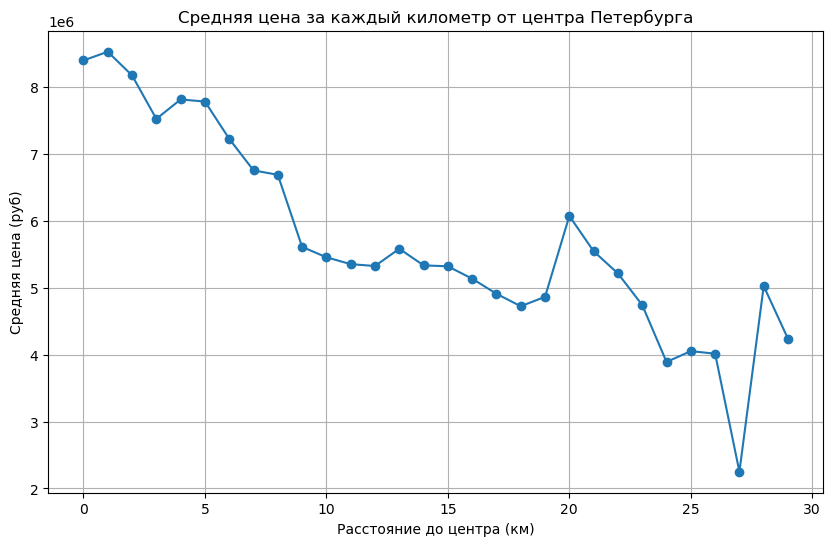

In [378]:
plt.figure(figsize=(10, 6))
plt.plot(avg_price_spb_per_km['distance_to_center_km'], avg_price_spb_per_km['avg_price_per_km'], marker='o', linestyle='-')
plt.title('Средняя цена за каждый километр от центра Петербурга')
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Средняя цена (руб)')
plt.grid(True)
plt.show()

In [379]:
avg_price_spb_per_km

distance_to_center_km  avg_price_per_km
0                     0.0      8.398000e+06
1                     1.0      8.528519e+06
2                     2.0      8.174742e+06
3                     3.0      7.524247e+06
4                     4.0      7.814996e+06
5                     5.0      7.783614e+06
6                     6.0      7.226642e+06
7                     7.0      6.754763e+06
8                     8.0      6.688561e+06
9                     9.0      5.610956e+06
10                   10.0      5.455738e+06
11                   11.0      5.353107e+06
12                   12.0      5.324999e+06
13                   13.0      5.583178e+06
14                   14.0      5.335071e+06
15                   15.0      5.320691e+06
16                   16.0      5.135245e+06
17                   17.0      4.909934e+06
18                   18.0      4.723879e+06
19                   19.0      4.864631e+06
20                   20.0      6.073517e+06
21                   21.0      5.545680e+06
22                   22.0      5.213991e+06
23                   23.0      4.741444e+06
24                   24.0      3.890687e+06
25                   25.0      4.052840e+06
26                   26.0      4.014287e+06
27                   27.0      2.250000e+06
28                   28.0      5.026429e+06
29                   29.0      4.236667e+06

Из данных видно, что:

Центральная часть города (0-5 км): Самая высокая средняя цена, что объясняется престижностью и доступностью центра.
Среднее расстояние от центра (6-15 км): Постепенное снижение цены по мере удаления от центра, с некоторыми колебаниями, вероятно, связанными с локальными особенностями инфраструктуры и застройки.
Дальние районы (16-30 км): Наблюдается снижение цен, с несколькими неожиданными пиками, что может быть связано с наличием специфических объектов недвижимости или особенностями районов.
Таким образом, стоимость объектов недвижимости в Санкт-Петербурге значительно зависит от расстояния до центра города: чем дальше от центра, тем ниже средняя цена за квадратный метр, с некоторыми локальными исключениями.

From the data, it is evident that:

Central part of the city (0-5 km): The highest average price, explained by the prestige and accessibility of the center.
Moderate distance from the center (6-15 km): Gradual decrease in price as the distance from the center increases, with some fluctuations, probably related to local infrastructure and construction features.
Distant areas (16-30 km): Price reduction is observed, with some unexpected peaks, which may be related to the presence of specific real estate objects or features of the areas.
Thus, the price of real estate objects in Saint Petersburg significantly depends on the distance to the city center: the farther from the center, the lower the average price per square meter, with some local exceptions.

## Общий вывод

    Время продажи квартир:

    Обычное время продажи: Исходя из полученных данных, можно сказать, что обычно продажа квартиры занимает несколько месяцев (от 90 до 180 дней).
    Быстрые продажи: Продажи с длительностью до 45 дней можно считать быстрыми.
    Необычно долгие продажи: Продажи, которые длительностью более 232 дней (и особенно свыше 360 дней), можно считать необычно долгими. Такие случаи требуют дополнительного анализа для понимания причин задержки продажи.
    
    Влияние различных факторов на цену:
    Общая площадь: Увеличение общей площади ведет к увеличению цены. Это подтверждается положительным значением коэффициента корреляции (0.6874194694415817), что указывает на сильную положительную связь между общей площадью и ценой квартиры.
    Жилая площадь: Аналогично общей площади, увеличение жилой площади также ведет к увеличению цены. Коэффициент корреляции (0.5756765056972228) подтверждает положительную связь этих параметров.
    Площадь кухни: Более просторные кухни могут быть признаком более высоких цен на квартиры. Коэффициент корреляции (0.4400961094061726) подтверждает положительную связь этих параметров.
    Количество комнат: Квартиры с большим количеством комнат обычно стоят дороже. Это подтверждается коэффициентом корреляции (0.4459929240887928), что связано с тем, что квартиры с большим числом комнат обладают большей площадью и предоставляют больше удобств.
    Наибольшая средняя стоимость квартир на этажах отличных от первого и последнего. Средняя стоимость квартир на последнем этаже несколько ниже, но наименьшая все у квартир на первом этаже. 
    Коэффициент корреляции близок к нулю (0.0031752094249518905), поэтому можно предположить, что существенно связи между стоимостью квартиры и годом публикации объявления нет. При этом как следует из графика средняя стоимость квартир в 2014 году была несколько выше, чем в сотальные годы. 
    Дата размещения объявления: Коэффициент корреляции близок к нулю (-0.011758024757373909), что указывает на отсутствие значимой связи между стоимостью квартиры и днем публикации объявления.
    
    Основные выводы:
    Наибольшее влияние на стоимость квартиры оказывают общая, жилая площадь и площадь кухни.
    
    Населенные пункты:
        Населенный пункт с самой высокой средней стоимостью квадратного метра - Санкт-Петербург.
        Населенный пункт с самой низкой средней стоимостью квадратного метра - Выборг.
    
    Стоимость объектов недвижимости и расстояние до центра:
Центральная часть города (0-5 км): Самая высокая средняя цена, что объясняется престижностью и доступностью центра.
Среднее расстояние от центра (6-15 км): Постепенное снижение цены по мере удаления от центра, с некоторыми колебаниями, вероятно, связанными с локальными особенностями инфраструктуры и застройки.
Дальние районы (16-30 км): Наблюдается снижение цен, с несколькими неожиданными пиками, что может быть связано с наличием специфических объектов недвижимости или особенностями районов.
    Таким образом, стоимость объектов недвижимости в Санкт-Петербурге значительно зависит от расстояния до центра города: чем дальше от центра, тем ниже средняя цена за квадратный метр, с некоторыми локальными исключениями.


    Overall Conclusion
Apartment Sales Time:

Typical sales time: Based on the obtained data, it can be said that the typical sales time for an apartment is several months (from 90 to 180 days).
Quick sales: Sales with a duration of up to 45 days can be considered quick.
Unusually long sales: Sales lasting more than 232 days (and especially more than 360 days) can be considered unusually long. Such cases require additional analysis to understand the reasons for the delay in sales.
Influence of Various Factors on Price:

Total area: An increase in total area leads to an increase in price. This is confirmed by a positive correlation coefficient (0.6874194694415817), indicating a strong positive relationship between total area and apartment price.
Living area: Similar to the total area, an increase in living area also leads to an increase in price. The correlation coefficient (0.5756765056972228) confirms a positive relationship between these parameters.
Kitchen area: More spacious kitchens may indicate higher apartment prices. The correlation coefficient (0.4400961094061726) confirms a positive relationship between these parameters.
Number of rooms: Apartments with more rooms are usually more expensive. This is confirmed by a correlation coefficient (0.4459929240887928), which is related to the fact that apartments with more rooms have a larger area and provide more amenities.
The highest average cost of apartments is on floors other than the first and last. The average cost of apartments on the last floor is slightly lower, but the lowest is for apartments on the first floor.
The correlation coefficient is close to zero (0.0031752094249518905), so it can be assumed that there is no significant relationship between the apartment price and the year of the advertisement publication. However, as shown in the graph, the average cost of apartments in 2014 was slightly higher than in other years.
Publication date: The correlation coefficient is close to zero (-0.011758024757373909), indicating no significant relationship between the apartment price and the day of the advertisement publication.
Main Conclusions:

The greatest influence on the apartment price is exerted by the total area, living area, and kitchen area.
Localities:

The locality with the highest average price per square meter is Saint Petersburg.
The locality with the lowest average price per square meter is Vyborg.
Real Estate Prices and Distance to the Center:

Central part of the city (0-5 km): The highest average price, explained by the prestige and accessibility of the center.
Moderate distance from the center (6-15 km): Gradual decrease in price as the distance from the center increases, with some fluctuations, probably related to local infrastructure and construction features.
Distant areas (16-30 km): Price reduction is observed, with some unexpected peaks, which may be related to the presence of specific real estate objects or features of the areas.
Thus, the price of real estate objects in Saint Petersburg significantly depends on the distance to the city center: the farther from the center, the lower the average price per square meter, with some local exceptions.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.

**Project Readiness Checklist** 

Mark 'x' in the completed items. Then press Shift+Enter.

- [x] The data file is opened.
- [x] The data file is explored: the first rows are displayed, the `info()` method is used, histograms are plotted.
- [x] Missing values are identified.
- [x] Missing values are filled where possible.
- [x] Explanation of which missing values were found.
- [x] Correct data types are set for each column.
- [x] Explanation of which columns had their data types changed and why.
- [x] Implicit duplicates in the names of localities are eliminated.
- [x] Rare and outlier values (anomalies) are handled.
- [x] New parameters are added to the table:
      – price per square meter;
      – day of the advertisement publication (0 - Monday, 1 - Tuesday, etc.);
      – month of the advertisement publication;
      – year of the advertisement publication;
      – type of apartment floor (values — “first”, “last”, “other”);
      – distance to the city center in kilometers.
- [x] Parameters are studied and described:
      - total area;
      - living area;
      - kitchen area;
      - object price;
      - number of rooms;
      - ceiling height;
      - type of apartment floor (“first”, “last”, “other”);
      - total number of floors in the building;
      - distance to the city center in meters;
      - distance to the nearest park.
- [x] The task "Study how quickly apartments were sold (`days_exposition` column)" is completed:
    - a histogram is plotted;
    - mean and median are calculated;
    - description of how long sales usually take and indication of which sales can be considered quick and which are unusually long.
- [x] The task "Determine the factors that most affect the overall (full) cost of the object" is completed. Graphs are plotted showing the dependence of price on parameters:
      - total area;
      - living area;
      - kitchen area;
      - number of rooms;
      - type of floor on which the apartment is located (first, last, other);
      - publication date (day of the week, month, year).
- [x] The task "Calculate the average price per square meter in the 10 localities with the most listings" is completed:
    - localities with the highest and lowest cost per square meter are identified.
- [x] The task "Identify apartments in Saint Petersburg using the `locality_name` column and calculate their average cost at different distances from the center" is completed:
    - each kilometer of distance is considered, average prices of apartments at one kilometer from the center, two kilometers, and so on are known;
    - description of how the cost of the object depends on the distance to the city center;
    - a graph of the change in average price for each kilometer from the center of Saint Petersburg is plotted.
- [x] Intermediate conclusions are made at each stage.
- [x] An overall conclusion is made at the end of the project.